In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
import scipy as sci
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV 

In [2]:
df=pd.read_excel('World_development_mesurement.xlsx')
df 

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [3]:
df.shape

(2704, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [5]:
for i in df.columns :
  if i!="Country":
    df[i] = df[i].apply(lambda x: re.sub("[$,%]","",x) if isinstance(x, str) and x is not None else x)
    df[i] = pd.to_numeric(df[i],errors='coerce') 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   float64
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   float64
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [7]:
((df.isnull().sum())/2704)*100

Birth Rate                 4.400888
Business Tax Rate         47.374260
CO2 Emissions             21.412722
Country                    0.000000
Days to Start Business    36.464497
Ease of Business          93.158284
Energy Usage              33.986686
GDP                        7.766272
Health Exp % GDP          11.427515
Health Exp/Capita         11.427515
Hours to do Tax           47.633136
Infant Mortality Rate      9.615385
Internet Usage             6.397929
Lending Interest          30.473373
Life Expectancy Female     5.029586
Life Expectancy Male       5.029586
Mobile Phone Usage         6.176036
Number of Records          0.000000
Population 0-14            8.136095
Population 15-64           8.136095
Population 65+             8.136095
Population Total           0.000000
Population Urban           0.961538
Tourism Inbound           13.609467
Tourism Outbound          17.418639
dtype: float64

In [8]:
df=df.drop(["Ease of Business","Number of Records"],axis=1)

In [9]:
# copying the dataframe
df1=df
df1=df1.drop("Country",axis=1)

In [10]:
# scaling the data
scl=MinMaxScaler()
df1=pd.DataFrame(scl.fit_transform(df1),columns=df1.columns)

In [11]:
# imputation of null values by KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_df = pd.DataFrame(knn_imputer.fit_transform(df1),columns=df1.columns)
imputed_df.head() 

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.282609,0.074403,0.010610,0.062915,0.009895,0.003369,0.124424,0.005855,0.062674,0.230216,...,0.666667,0.588235,0.000000,0.586387,0.377604,0.149378,0.023470,0.563181,0.000506,0.001523
1,0.934783,0.416017,0.001151,0.183838,0.002746,0.000558,0.119816,0.002019,0.106028,0.906475,...,0.166667,0.137255,0.000000,0.937173,0.065104,0.091286,0.010296,0.263617,0.000166,0.001152
2,0.782609,0.179027,0.000194,0.050216,0.000724,0.000141,0.161290,0.001312,0.112674,0.633094,...,0.375000,0.313725,0.000000,0.879581,0.111979,0.107884,0.005131,0.327887,0.000381,0.000393
3,0.434783,0.043518,0.000515,0.146609,0.000670,0.000352,0.179724,0.015142,0.077512,0.374101,...,0.270833,0.235294,0.034483,0.693717,0.294271,0.107884,0.001286,0.490196,0.001131,0.001650
4,0.847826,0.180659,0.000125,0.070130,0.007332,0.000157,0.198157,0.001009,0.242504,0.676259,...,0.270833,0.235294,0.000000,0.916230,0.080729,0.103734,0.008580,0.104575,0.000111,0.000235


In [12]:
# To check unique countries
len(df["Country"].unique())

208

In [13]:
df3=pd.concat([df["Country"], imputed_df], axis=1)
df3

,Country,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,Algeria,0.282609,0.074403,0.010610,0.062915,0.009895,0.003369,0.124424,0.005855,0.062674,...,0.666667,0.588235,0.000000,0.586387,0.377604,0.149378,0.023470,0.563181,0.000506,0.001523
1,Angola,0.934783,0.416017,0.001151,0.183838,0.002746,0.000558,0.119816,0.002019,0.106028,...,0.166667,0.137255,0.000000,0.937173,0.065104,0.091286,0.010296,0.263617,0.000166,0.001152
2,Benin,0.782609,0.179027,0.000194,0.050216,0.000724,0.000141,0.161290,0.001312,0.112674,...,0.375000,0.313725,0.000000,0.879581,0.111979,0.107884,0.005131,0.327887,0.000381,0.000393
3,Botswana,0.434783,0.043518,0.000515,0.146609,0.000670,0.000352,0.179724,0.015142,0.077512,...,0.270833,0.235294,0.034483,0.693717,0.294271,0.107884,0.001286,0.490196,0.001131,0.001650
4,Burkina Faso,0.847826,0.180659,0.000125,0.070130,0.007332,0.000157,0.198157,0.001009,0.242504,...,0.270833,0.235294,0.000000,0.916230,0.080729,0.103734,0.008580,0.104575,0.000111,0.000235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,Turks and Caicos Islands,0.213043,0.044545,0.004650,0.067821,0.000682,0.000148,0.282028,0.168807,0.063679,...,0.895833,0.756863,0.275862,0.332461,0.470833,0.403320,0.000010,0.903050,0.001158,0.012842
2700,United States,0.130435,0.115443,0.674995,0.005772,0.781766,1.000000,0.788018,0.897739,0.062983,...,0.875000,0.764706,0.344828,0.204188,0.502604,0.551867,0.232369,0.794118,1.000000,1.000000
2701,Uruguay,0.173913,0.101843,0.000362,0.008658,0.003697,0.003074,0.373272,0.131839,0.115147,...,0.854167,0.725490,0.517241,0.267016,0.429688,0.568465,0.002500,0.943355,0.011101,0.008120
2702,"Venezuela, RB",0.282609,0.162285,0.000017,0.206349,0.021048,0.023468,0.175115,0.059661,0.301391,...,0.812500,0.686275,0.344828,0.445026,0.463542,0.236515,0.022164,0.879085,0.004514,0.025296


In [14]:
# here we group the country by mean giving more weight to recent value or recent year
weight = [0.1,0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.92]
weighted_mean = lambda x : np.average(x, weights=weight)
df3=df3.groupby('Country')[[i for i in df3.columns if i!='Country']].agg(weighted_mean).reset_index()
df3

,Country,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,Afghanistan,0.742758,0.087323,0.000452,0.011864,0.006271,0.000702,0.381828,0.003160,0.102848,...,0.428645,0.394049,0.106056,0.969395,0.042977,0.075143,0.019724,0.170508,0.000427,0.000609
1,Albania,0.148149,0.099964,0.000564,0.029295,0.000772,0.000633,0.243417,0.019545,0.132627,...,0.846561,0.713858,0.241739,0.335280,0.486402,0.374180,0.002147,0.450787,0.007017,0.009674
2,Algeria,0.347939,0.172873,0.013198,0.036638,0.013425,0.008648,0.146859,0.015989,0.151897,...,0.684295,0.620165,0.227263,0.430988,0.515333,0.176189,0.026384,0.626744,0.001591,0.004118
3,American Samoa,0.224948,0.043379,0.000482,0.081319,0.002298,0.001242,0.292881,0.302602,0.075718,...,0.859463,0.729074,0.206897,0.308473,0.516991,0.368180,0.000028,0.867517,0.015525,0.018490
4,Andorra,0.089791,0.118979,0.000053,0.018580,0.020789,0.006533,0.264842,0.270076,0.073500,...,0.893497,0.754470,0.262375,0.284908,0.484647,0.456781,0.000044,0.880002,0.003675,0.007291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Vietnam,0.209824,0.089637,0.012731,0.059831,0.017353,0.005763,0.254544,0.006156,0.340557,...,0.849821,0.654396,0.264802,0.354912,0.539012,0.259436,0.062737,0.225818,0.018618,0.009326
204,Virgin Islands (U.S.),0.120260,0.134545,0.000246,0.016755,0.011698,0.002953,0.270731,0.159590,0.072490,...,0.897789,0.761638,0.250182,0.258712,0.484619,0.498185,0.000065,0.936264,0.006077,0.006815
205,"Yemen, Rep.",0.582252,0.159189,0.002403,0.054335,0.002747,0.001489,0.192948,0.005455,0.094132,...,0.507796,0.465143,0.102819,0.835420,0.161078,0.099893,0.015916,0.241887,0.003072,0.002075
206,Zambia,0.795221,0.068992,0.000276,0.042895,0.002888,0.000776,0.258948,0.006176,0.070237,...,0.270535,0.254646,0.101335,0.914705,0.082637,0.098600,0.009184,0.321767,0.000596,0.000884


In [15]:
df3.shape

(208, 23)

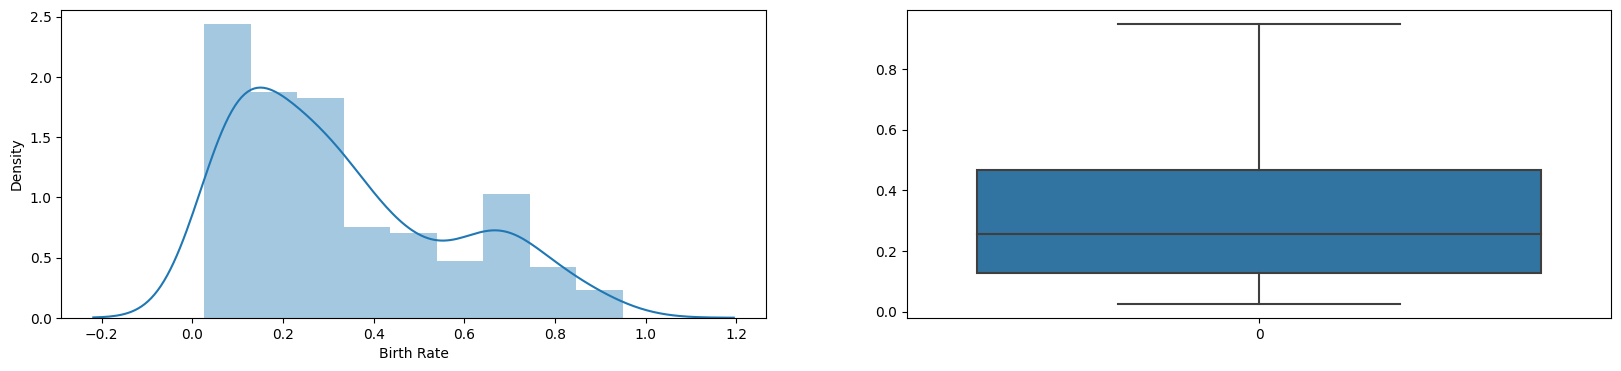

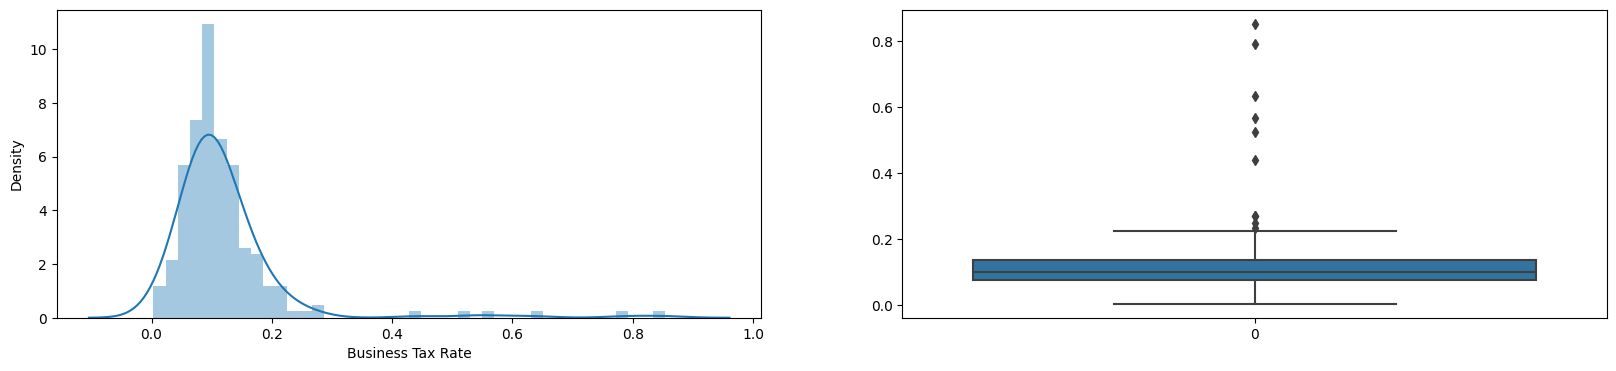

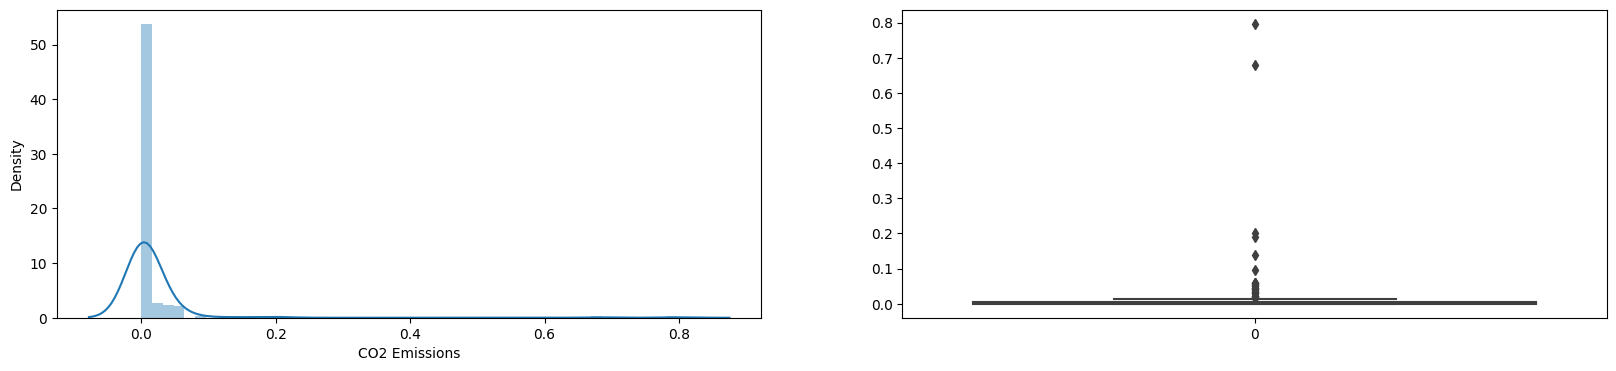

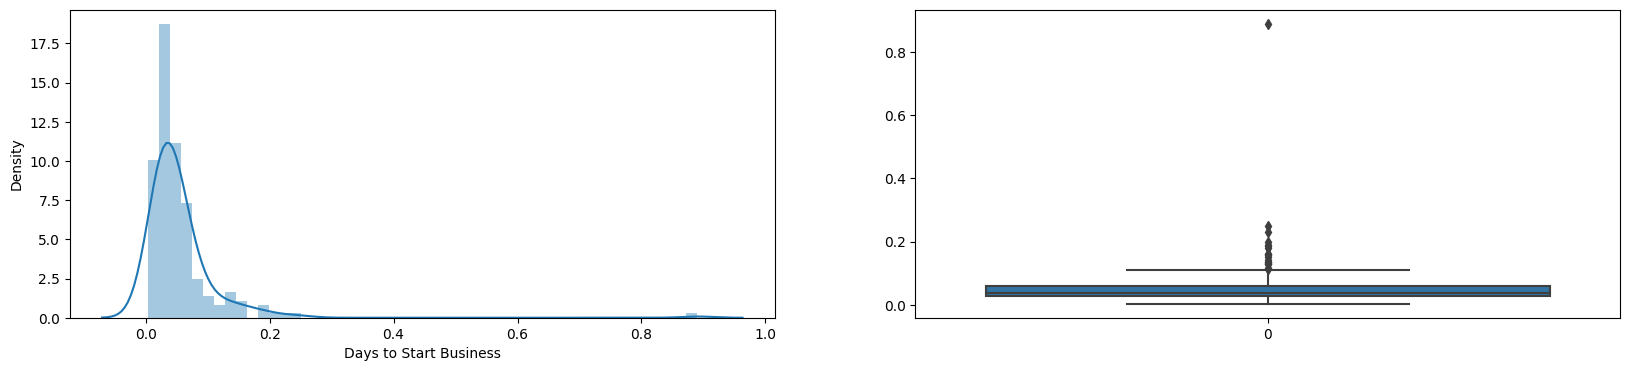

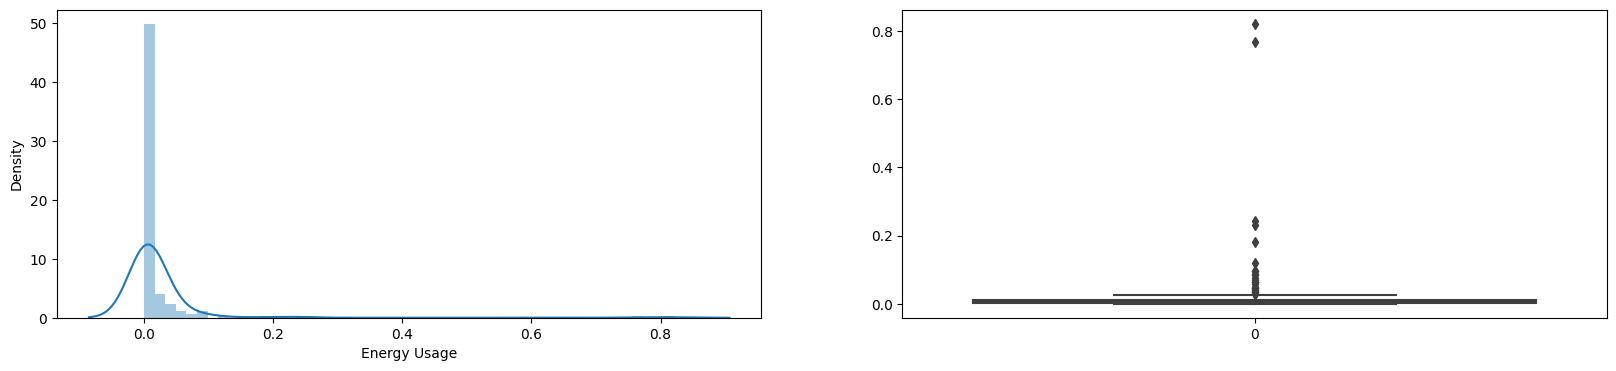

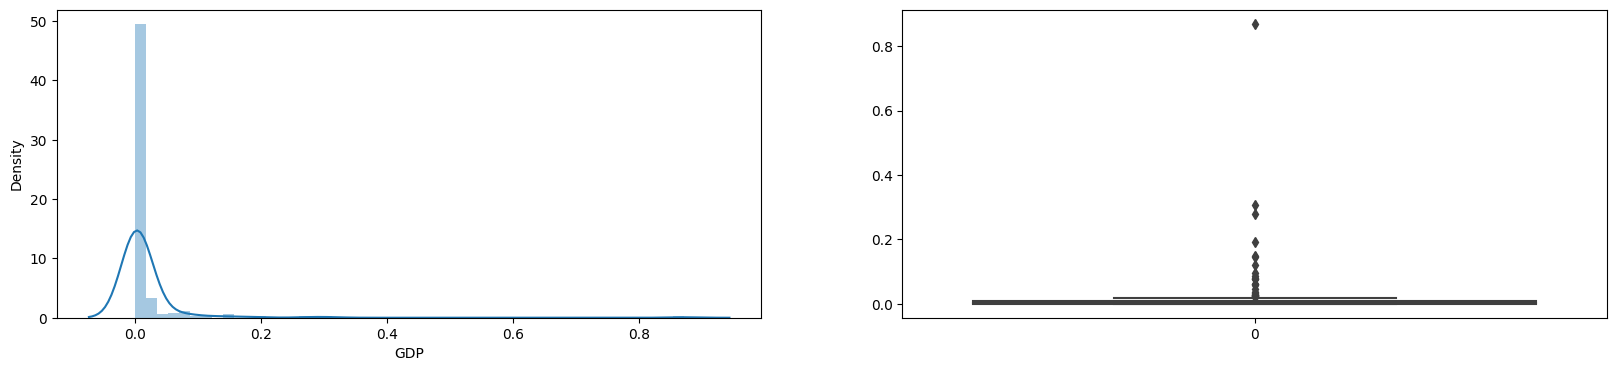

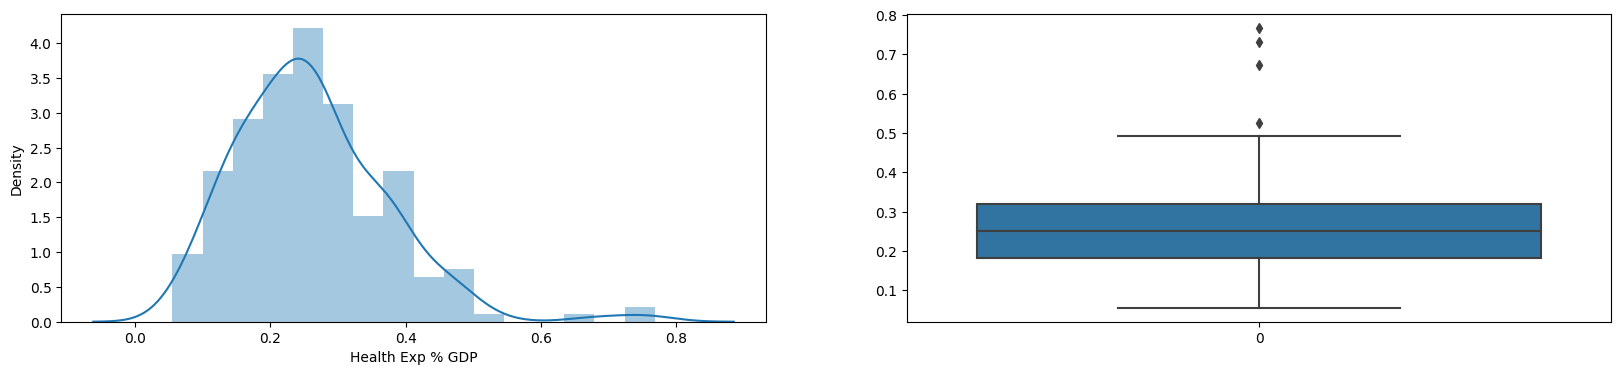

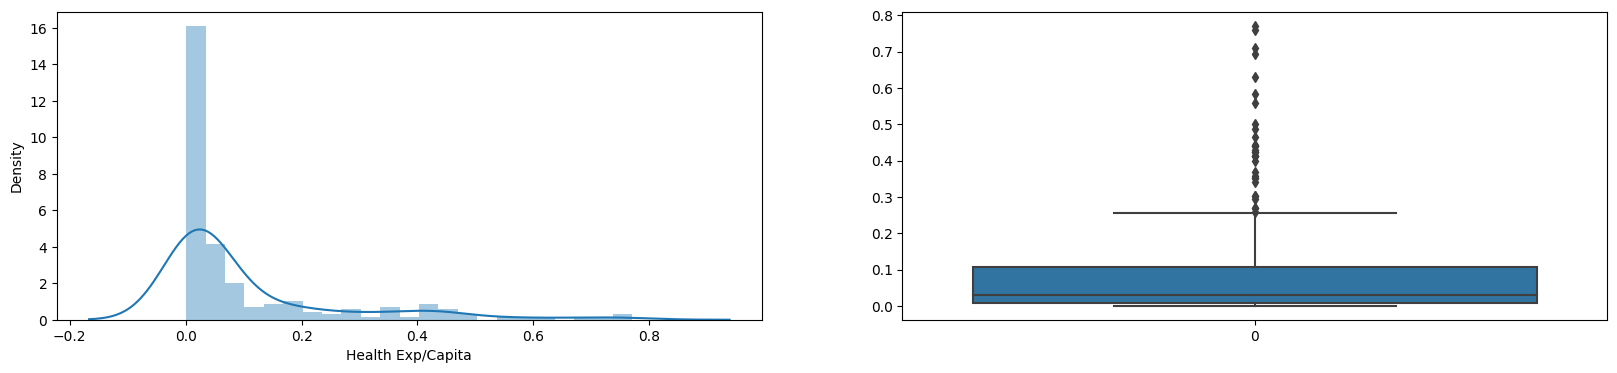

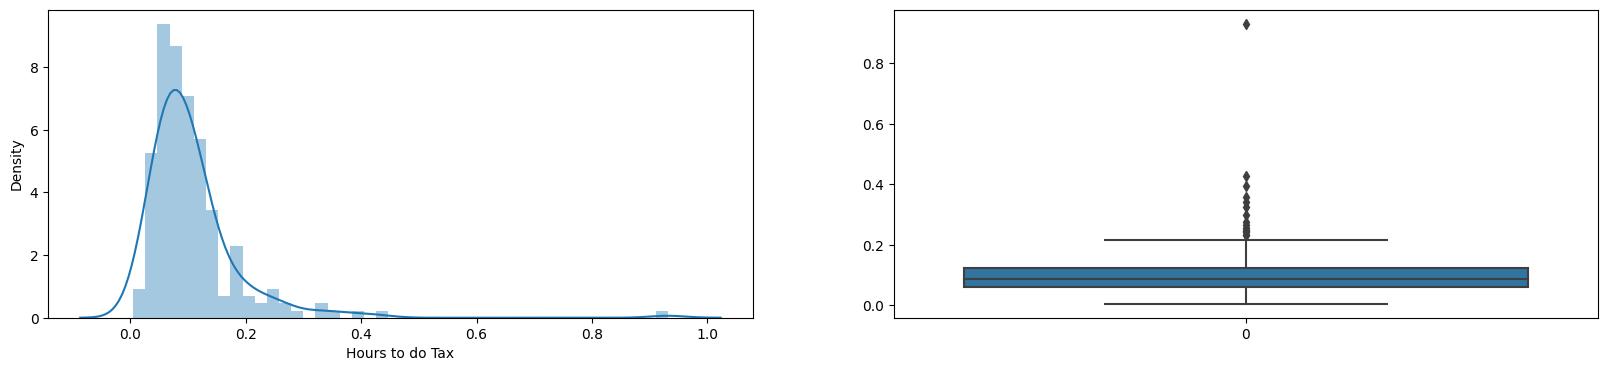

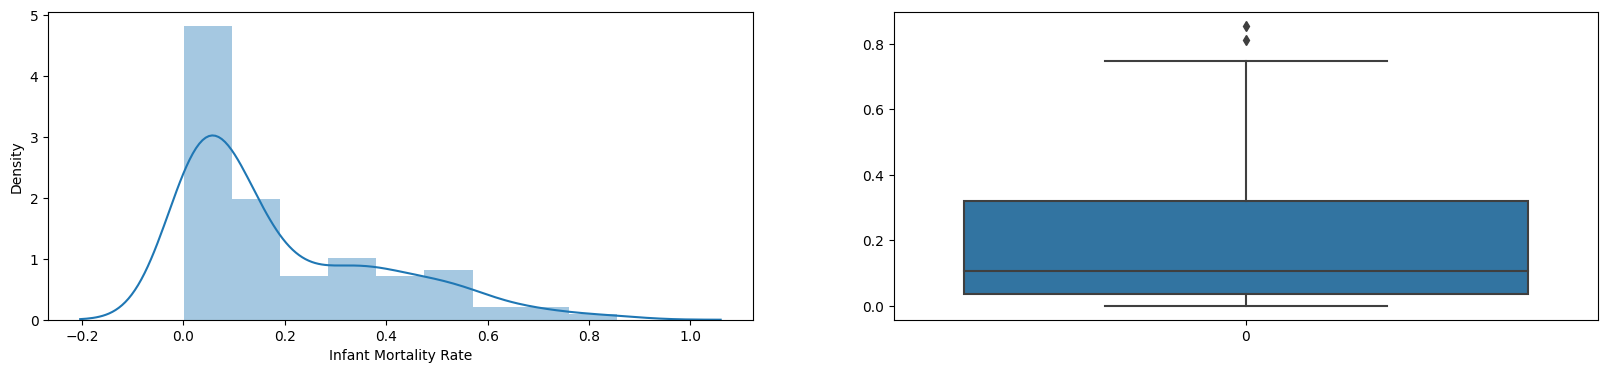

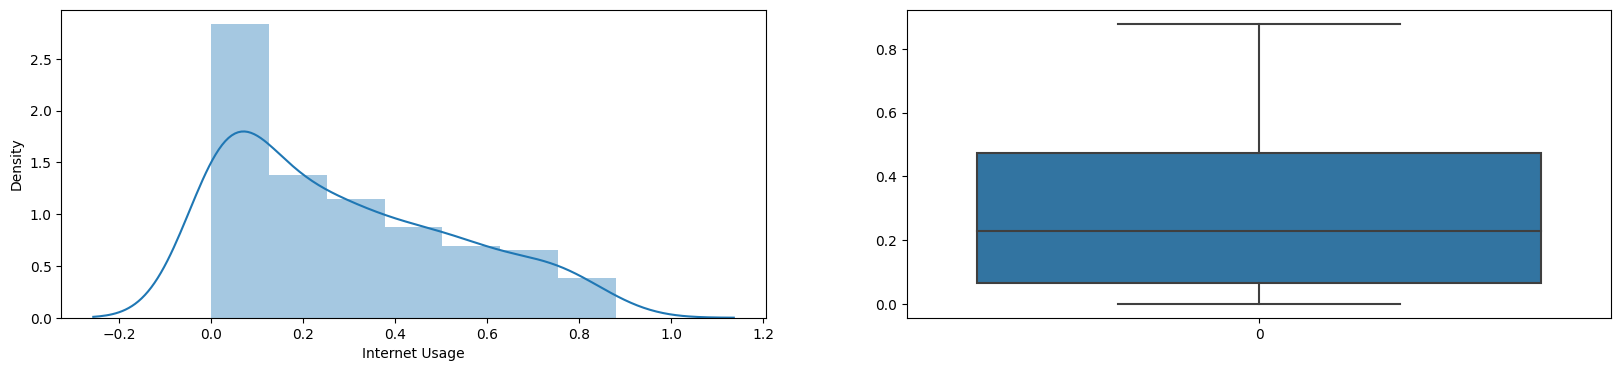

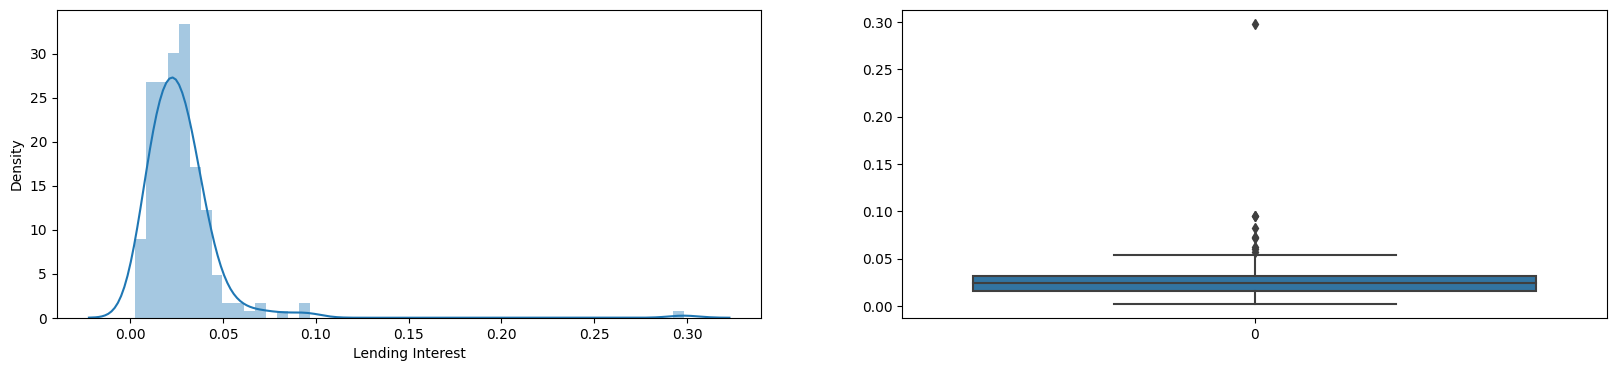

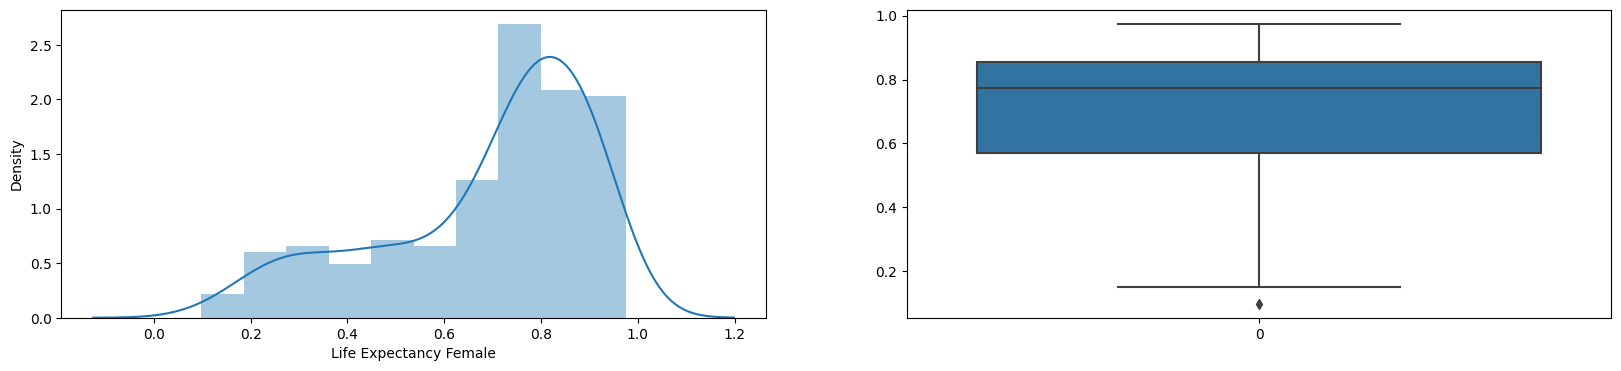

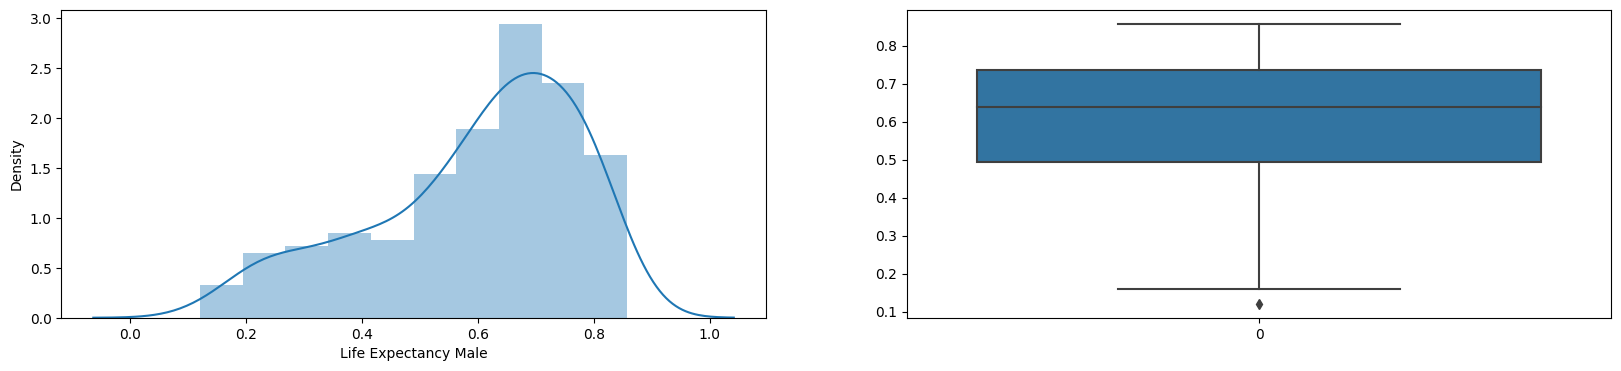

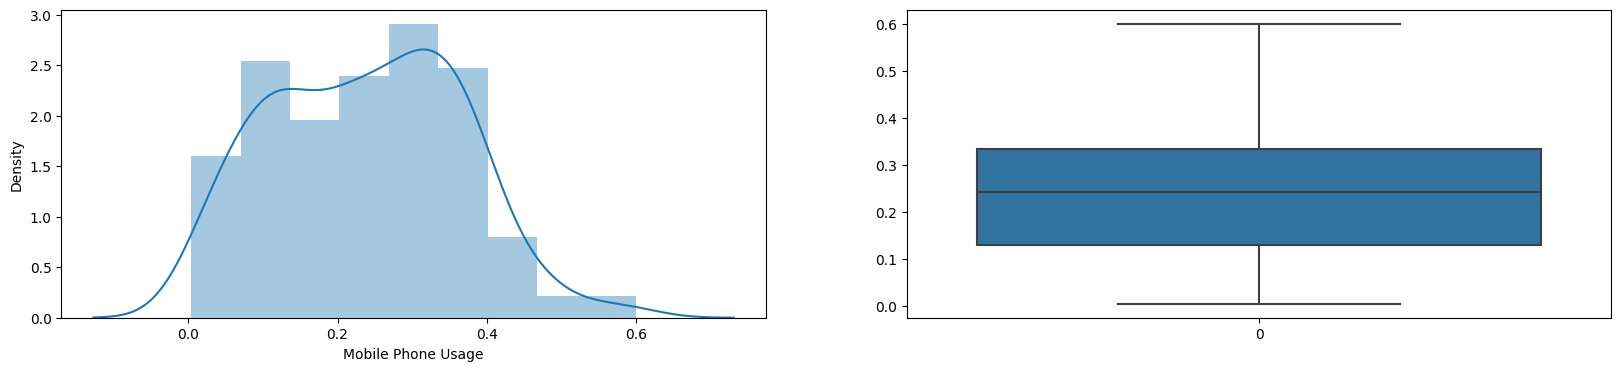

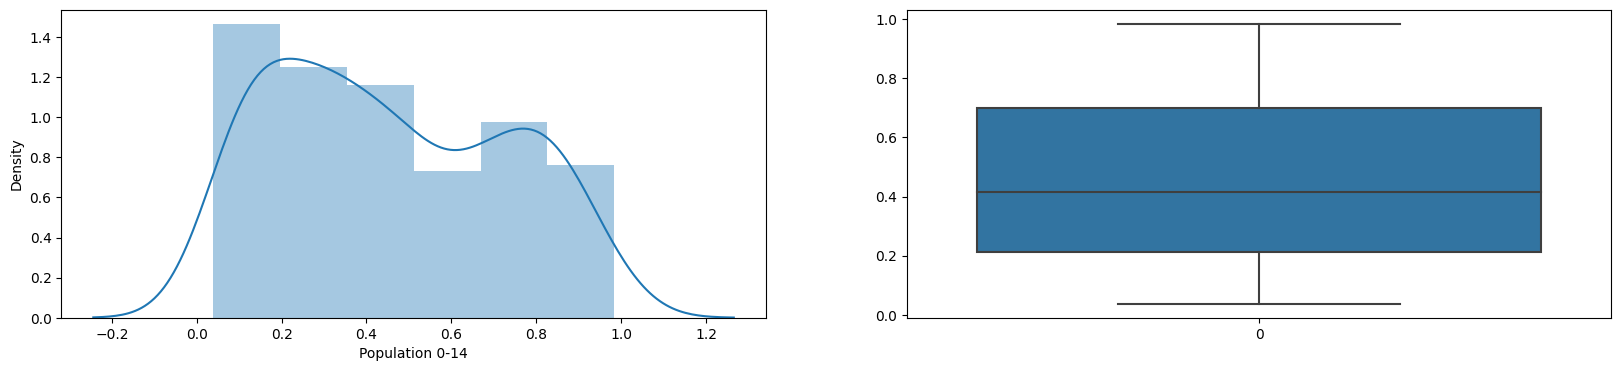

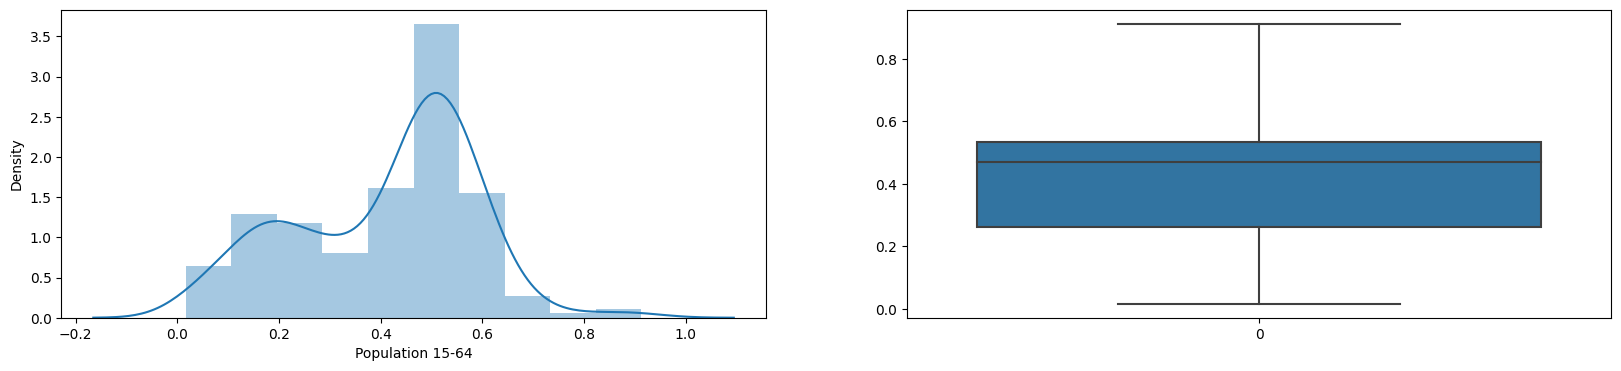

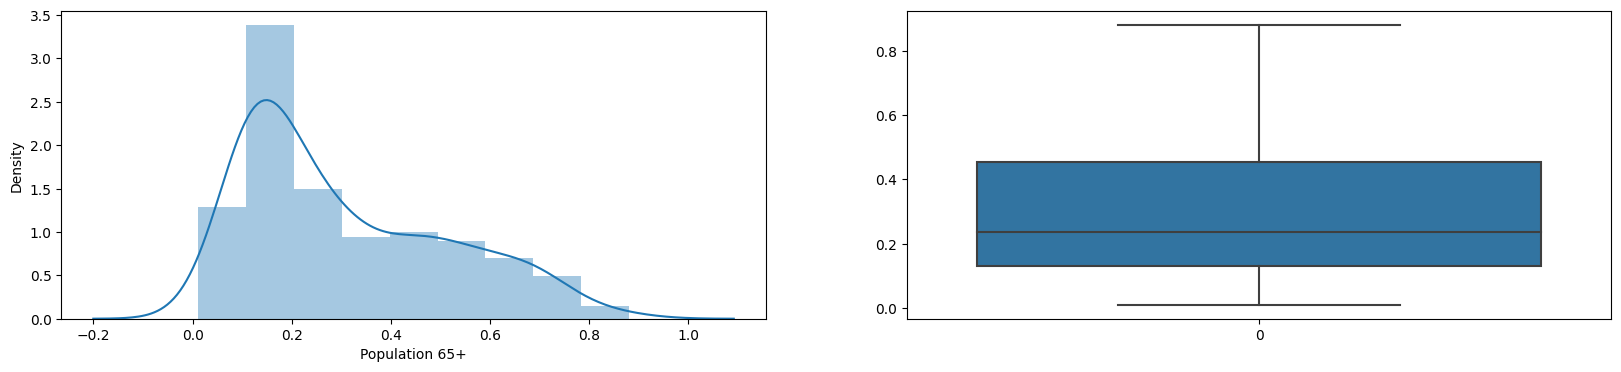

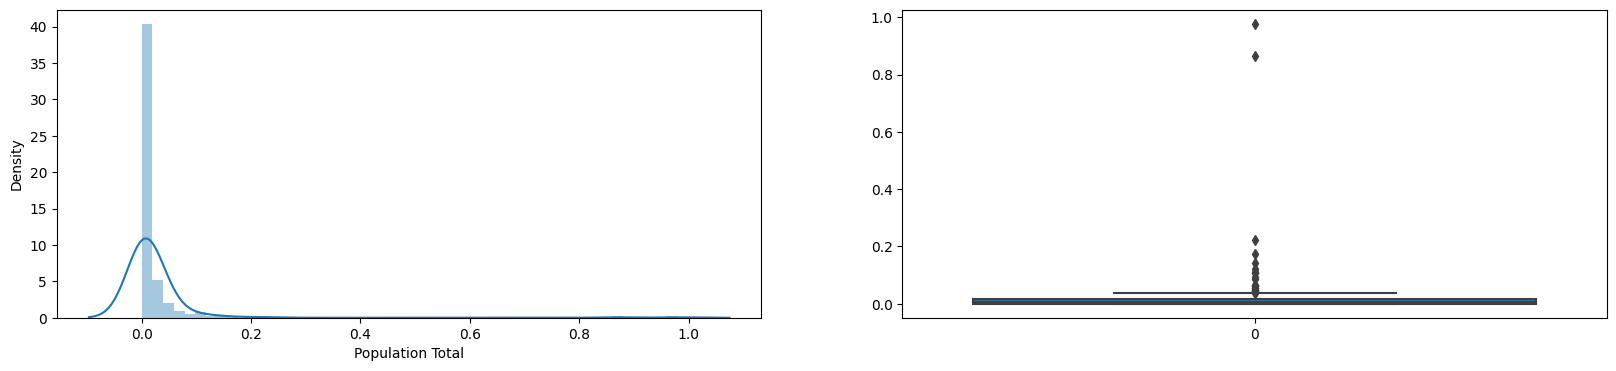

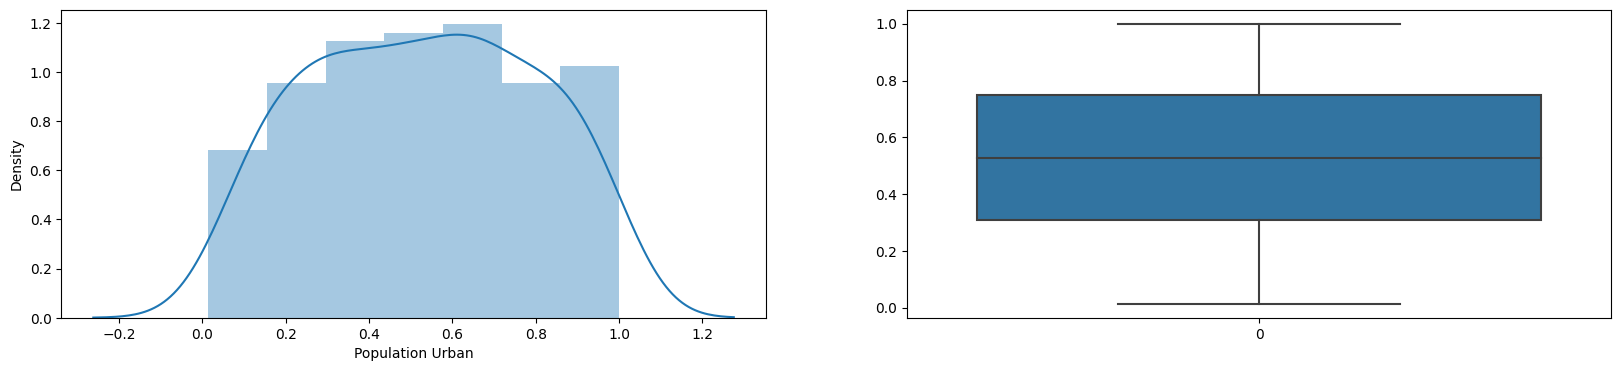

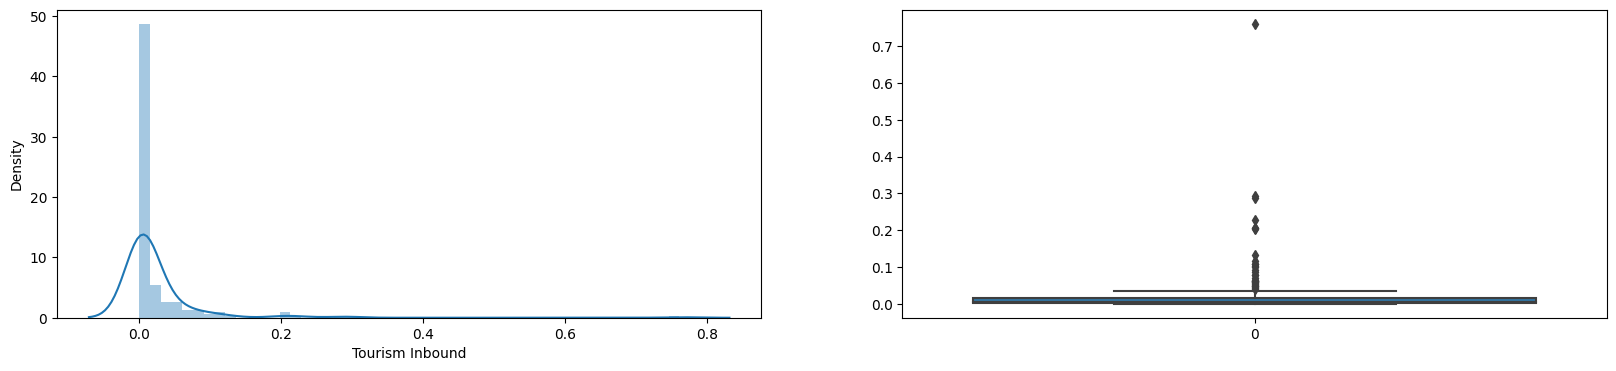

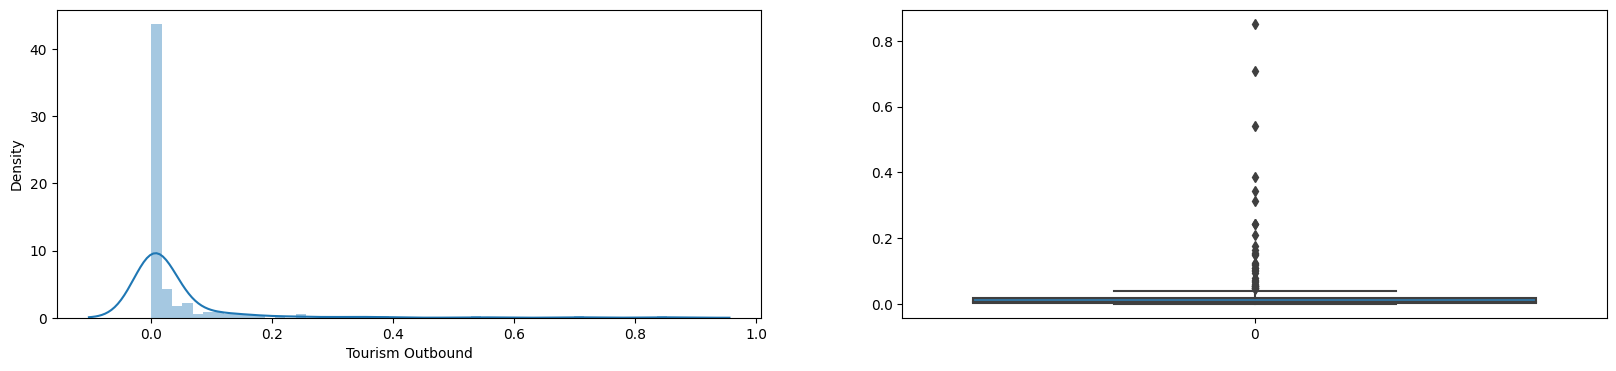

In [16]:
def plot(x,**kwarge):
  fig, ax = plt.subplots(1, 2, figsize=(20,4))
  sns.distplot(x, ax=ax[0],kde=True)
  sns.boxplot(x, ax=ax[1])
  plt.show()
for i in df3.columns:
  if i!="Country":
    plot(df3[i])
  else:
    continue

In [17]:
for column in df3.columns:
    if column not in ['Life Expectancy Female','Life Expectancy Male','Population 15-64',"Country","Population 0-14","Mobile Phone Usage"]:
        df3[column] = np.log(df3[column].replace(0, np.nan).dropna()) 

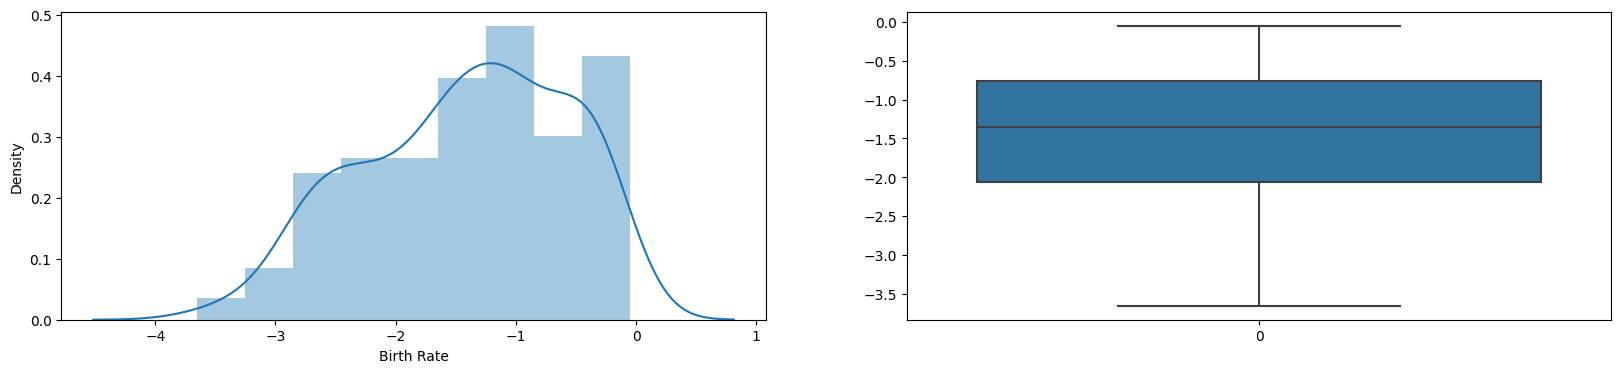

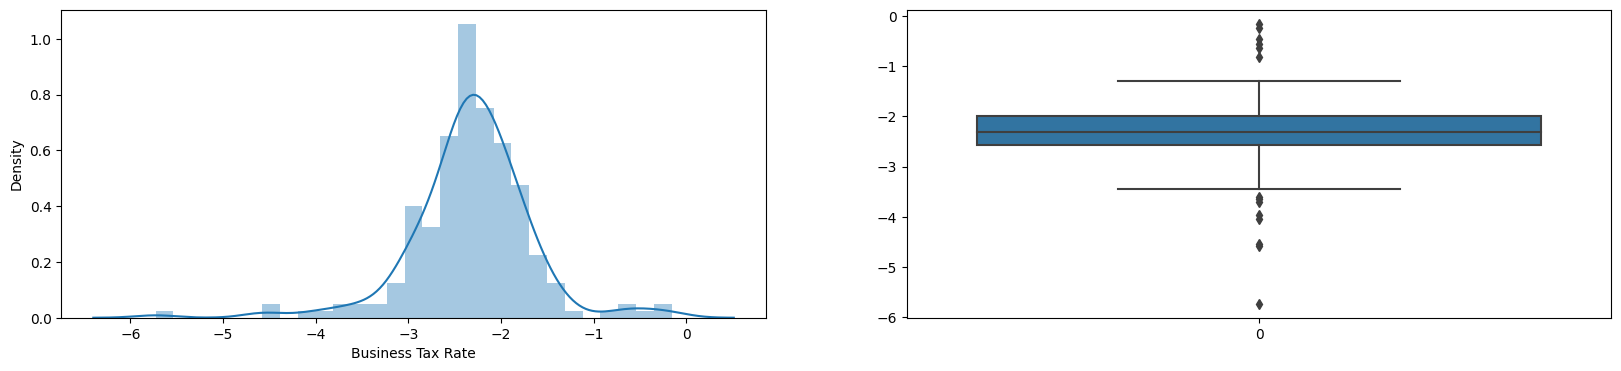

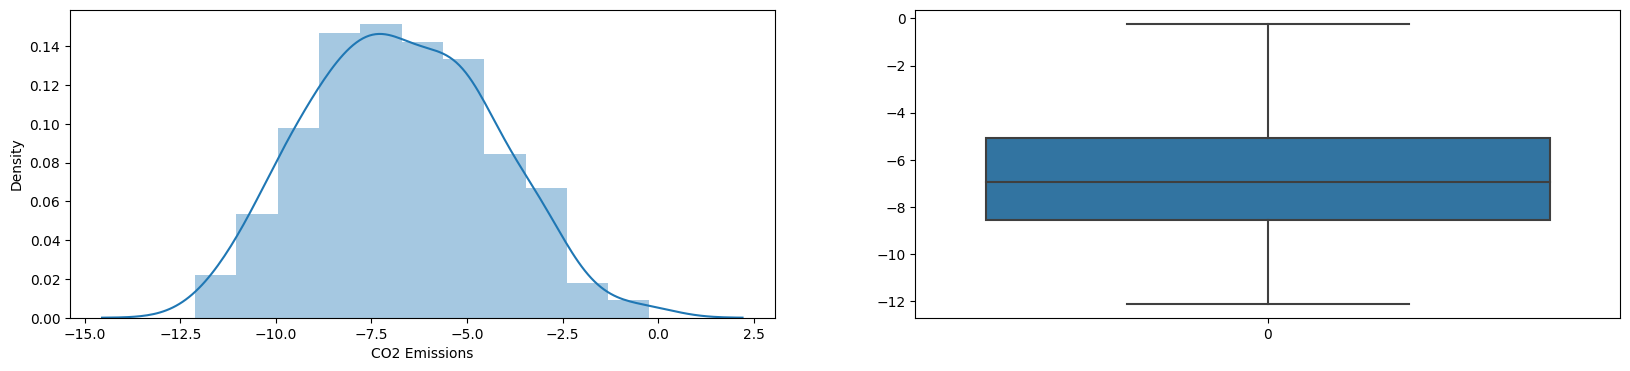

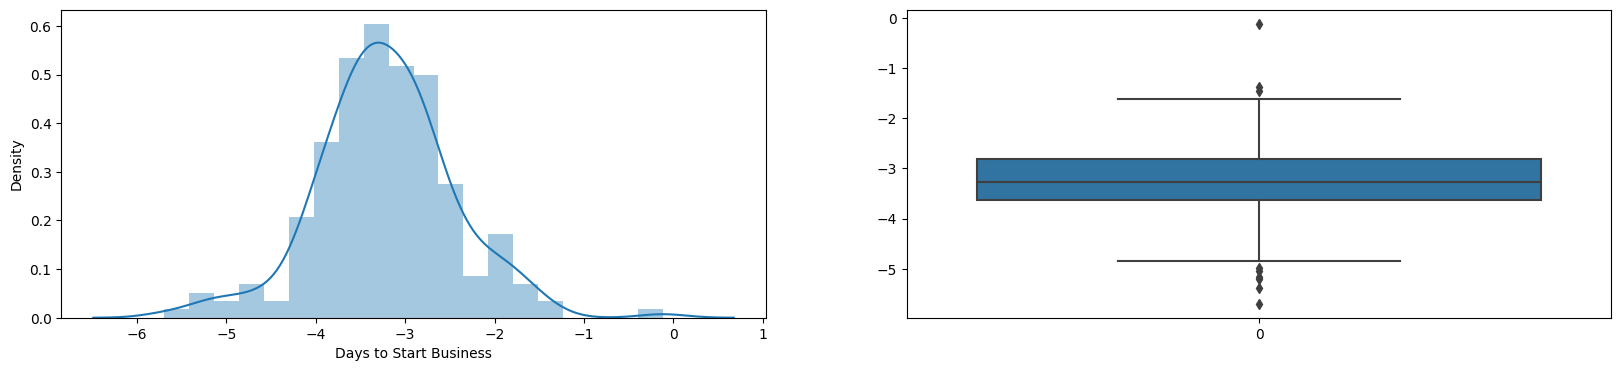

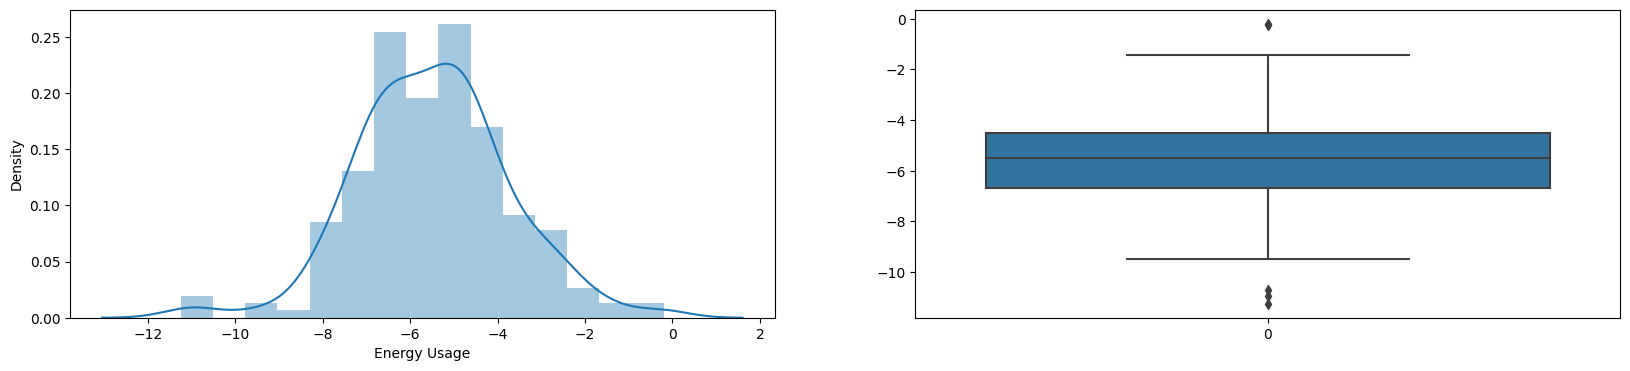

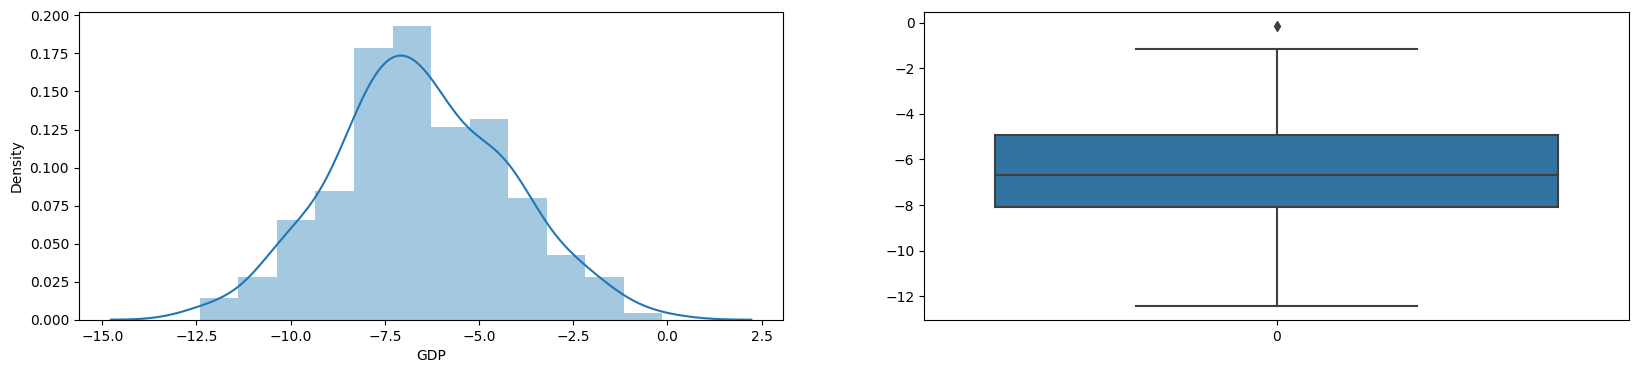

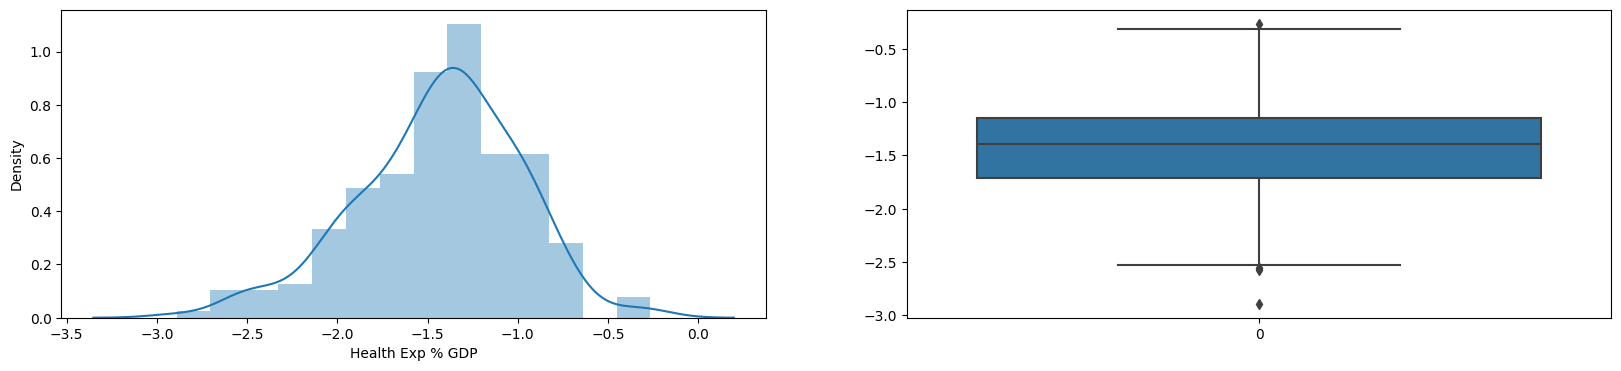

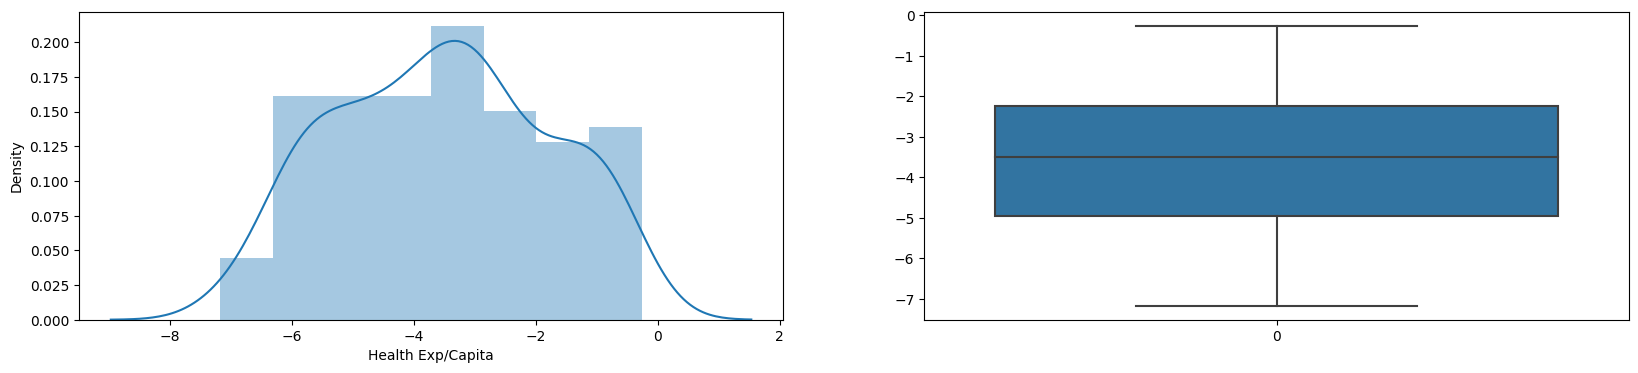

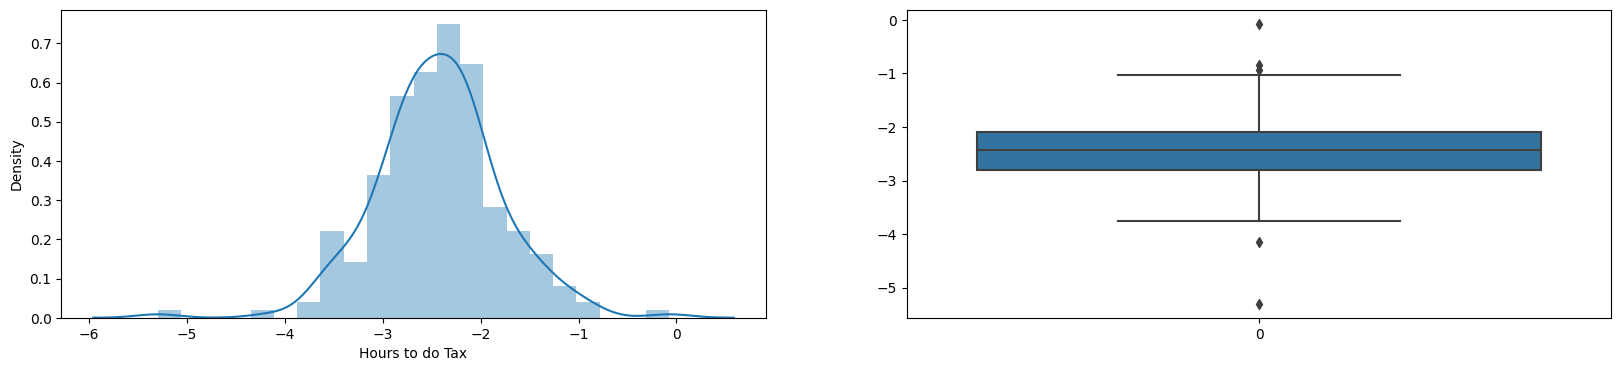

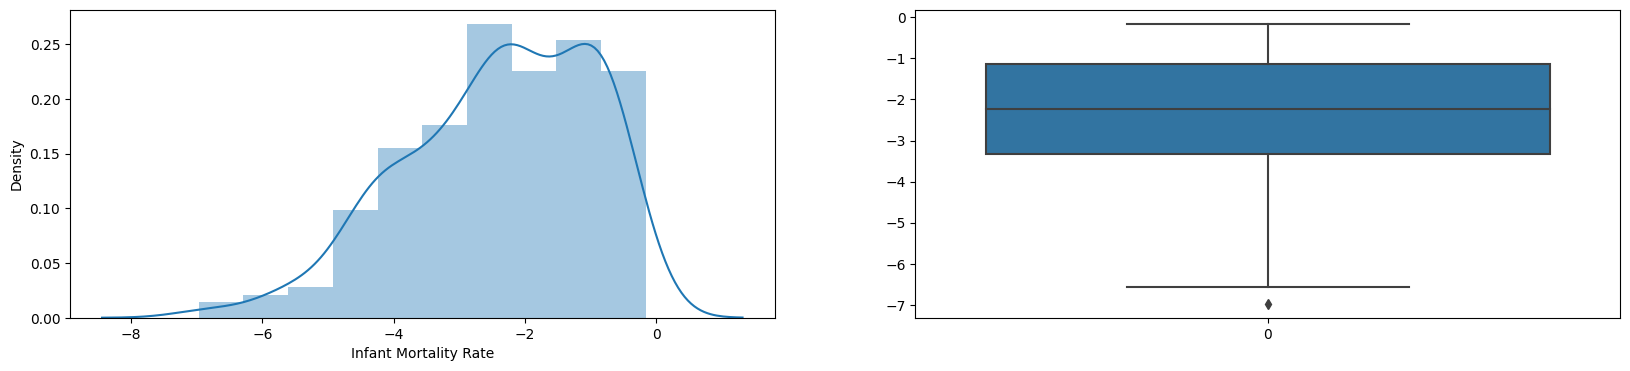

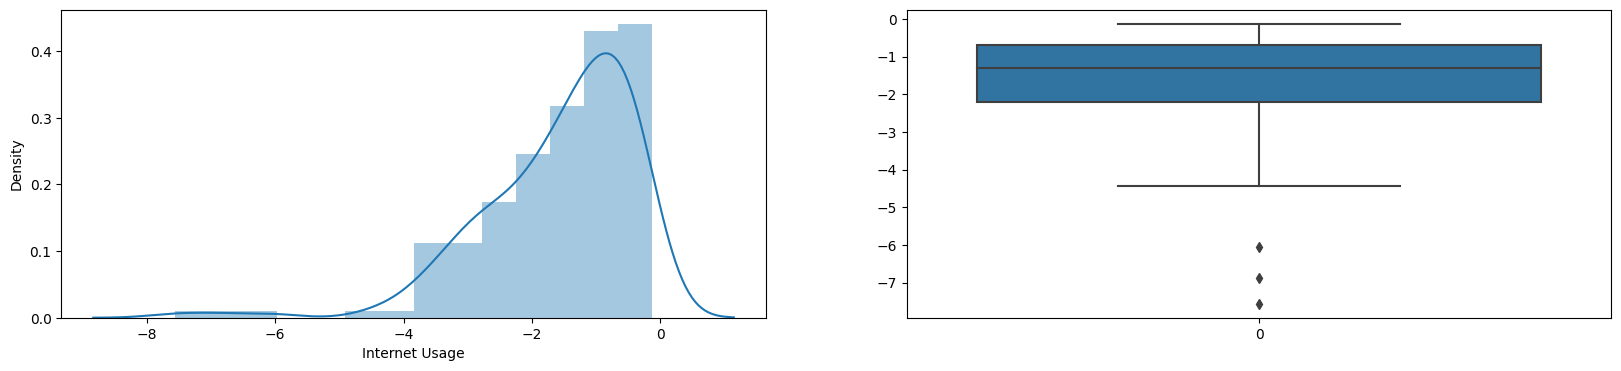

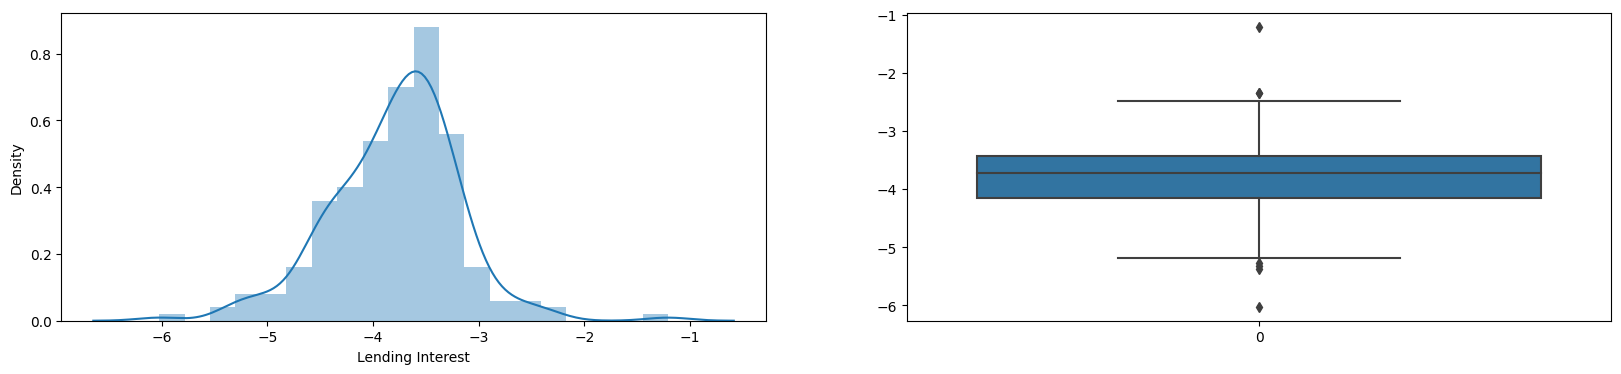

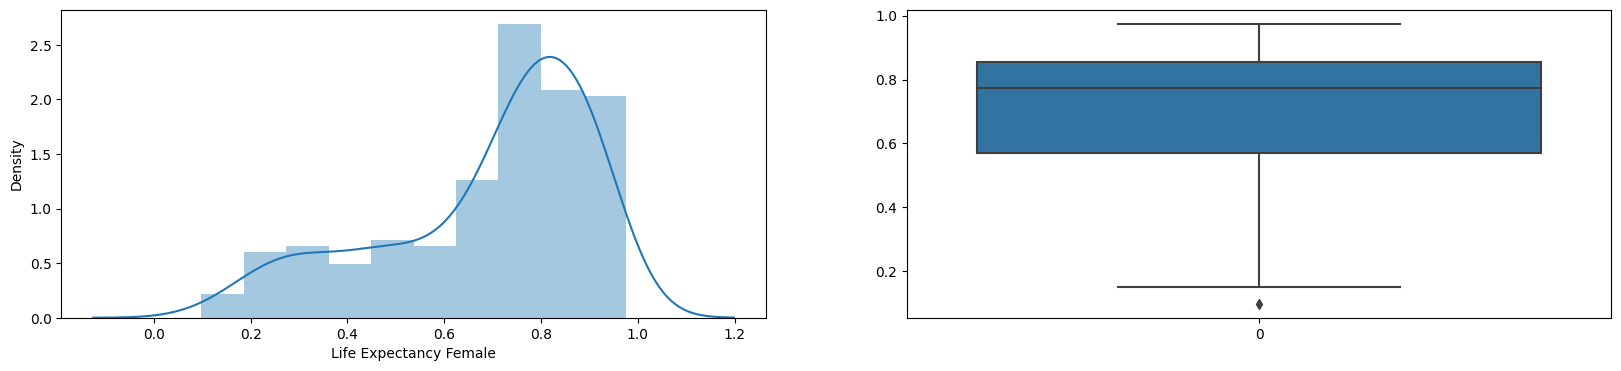

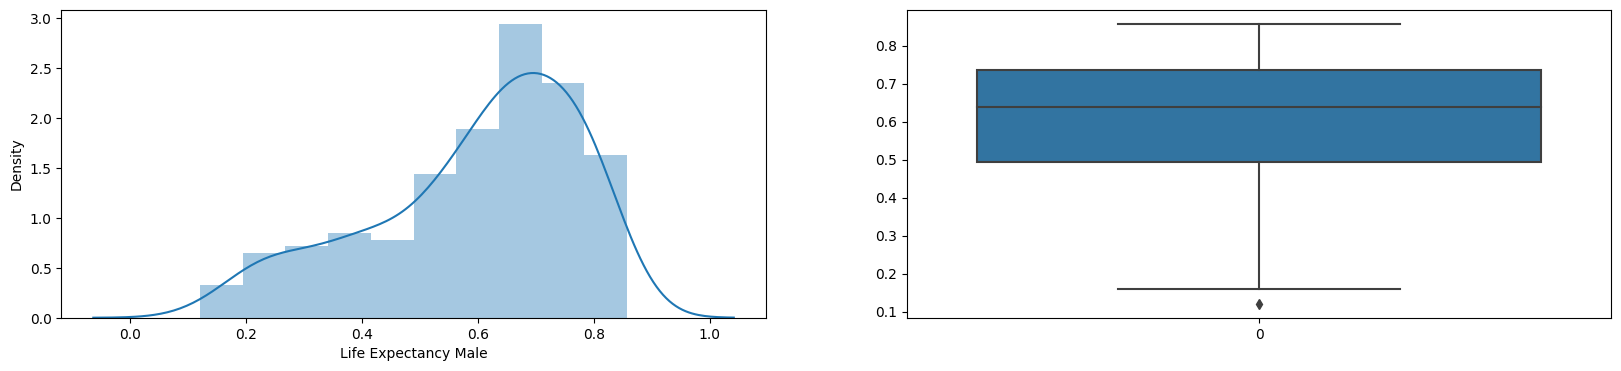

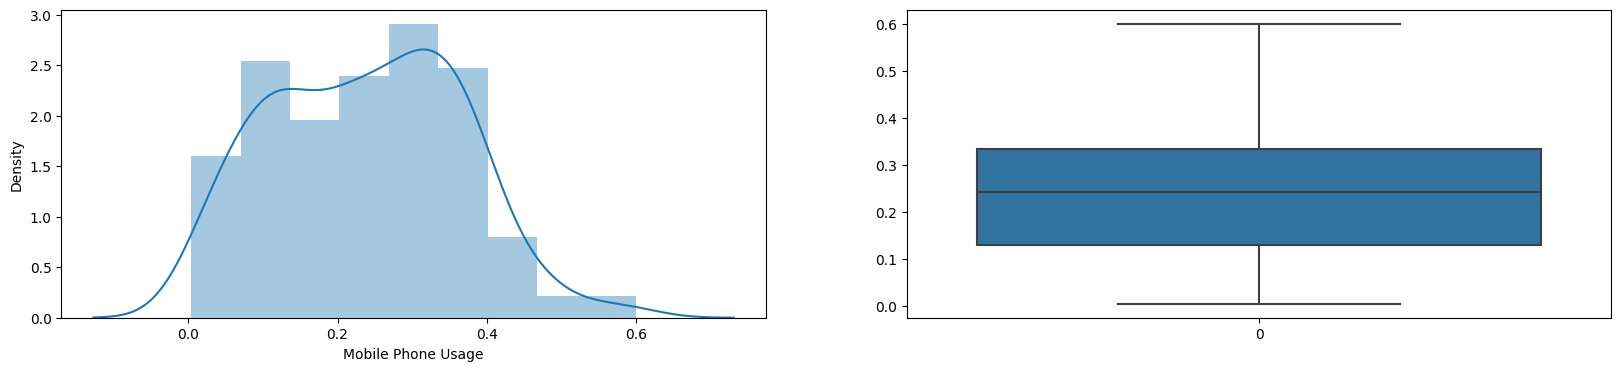

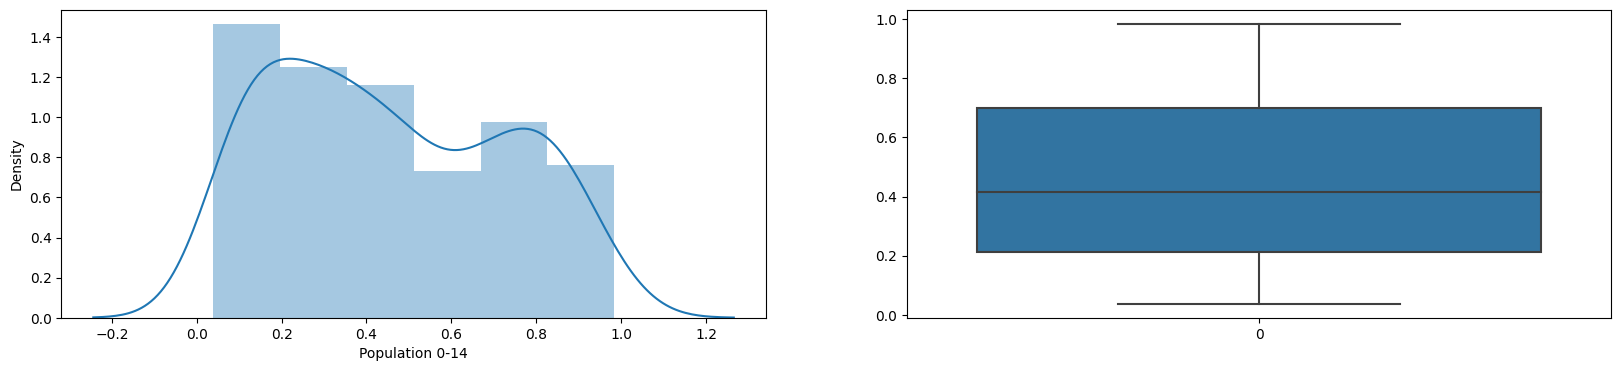

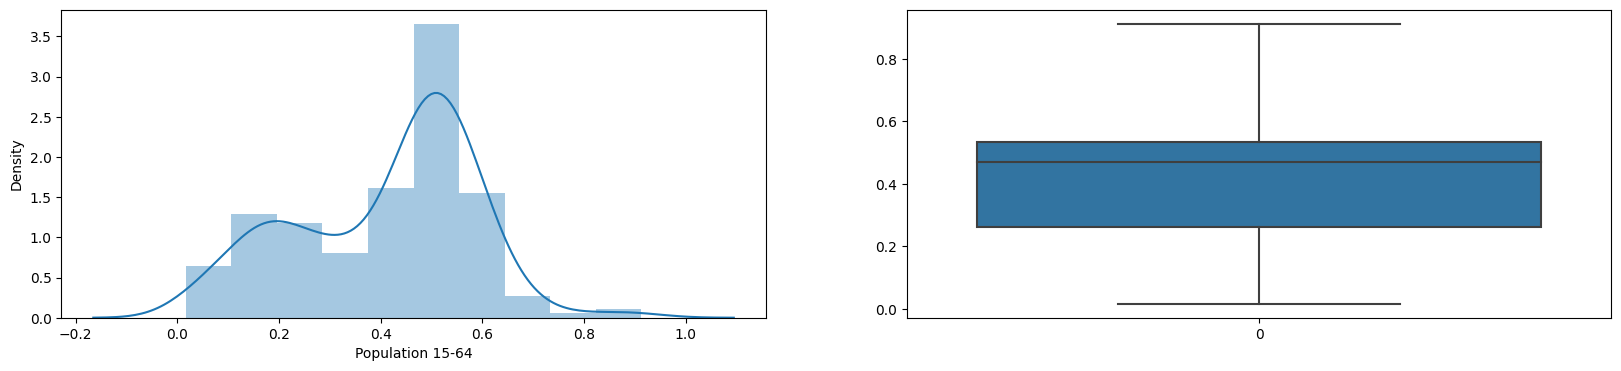

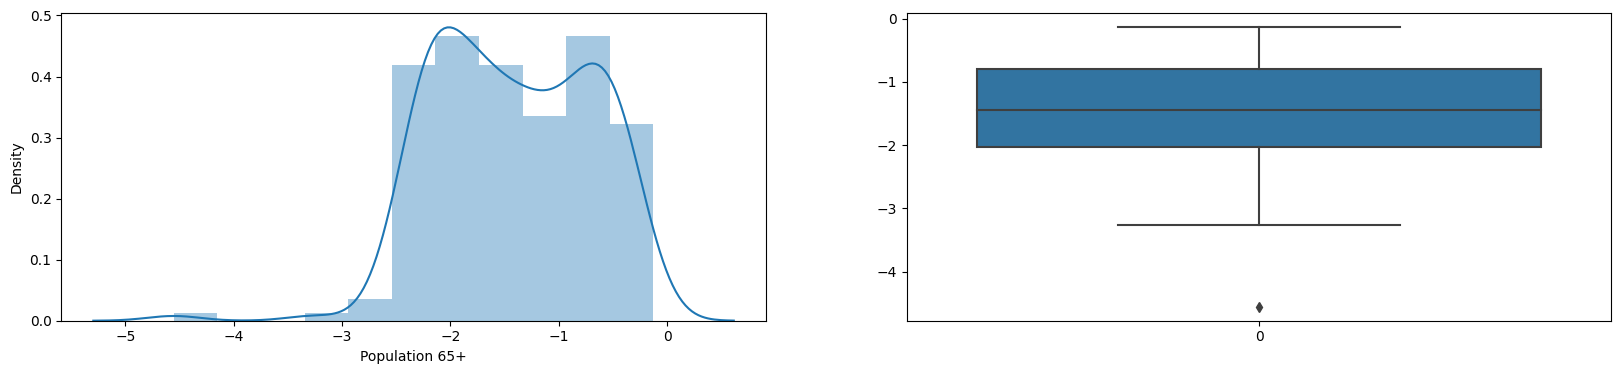

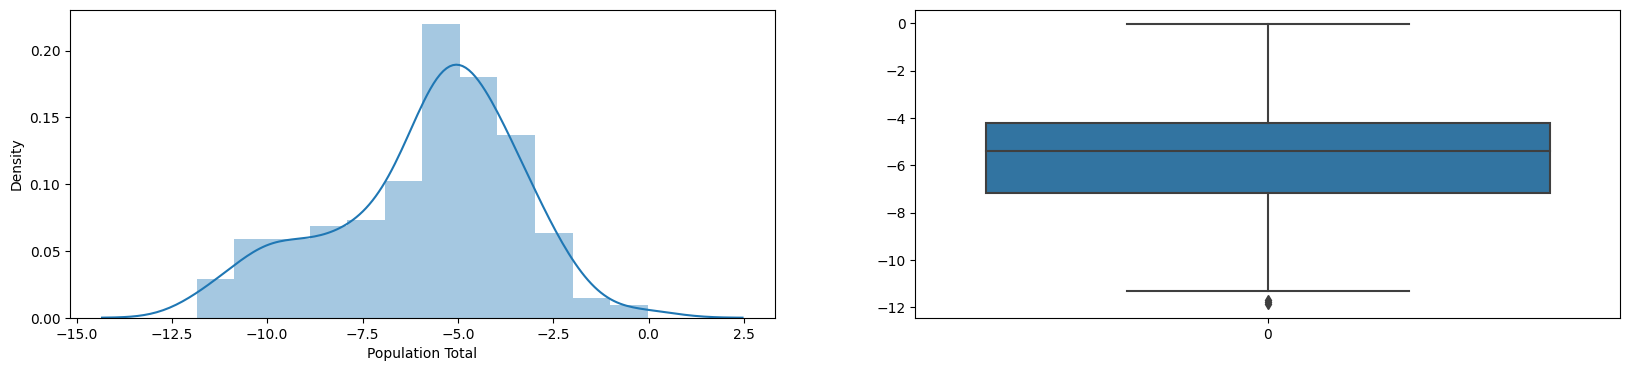

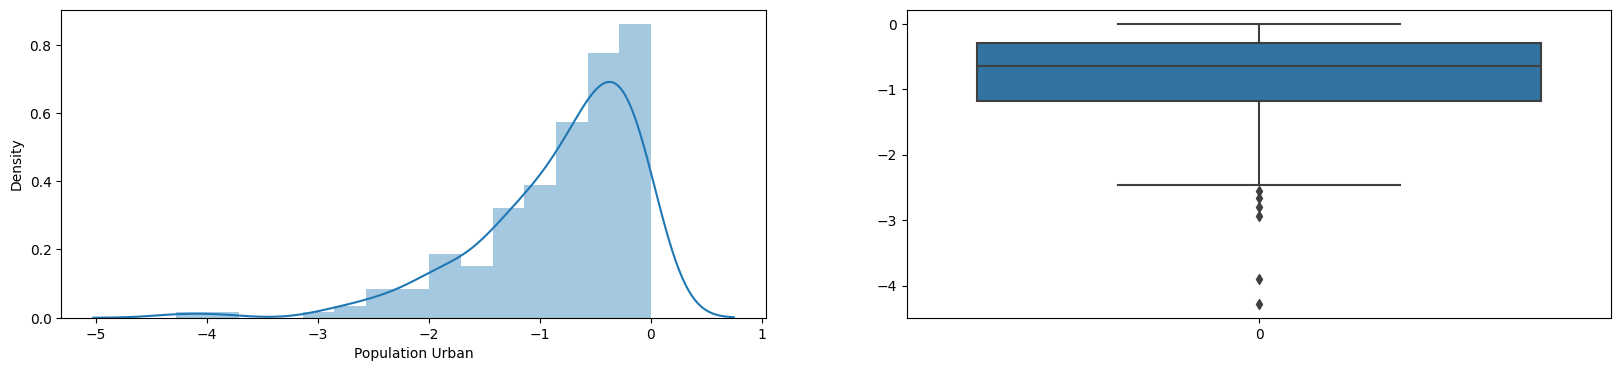

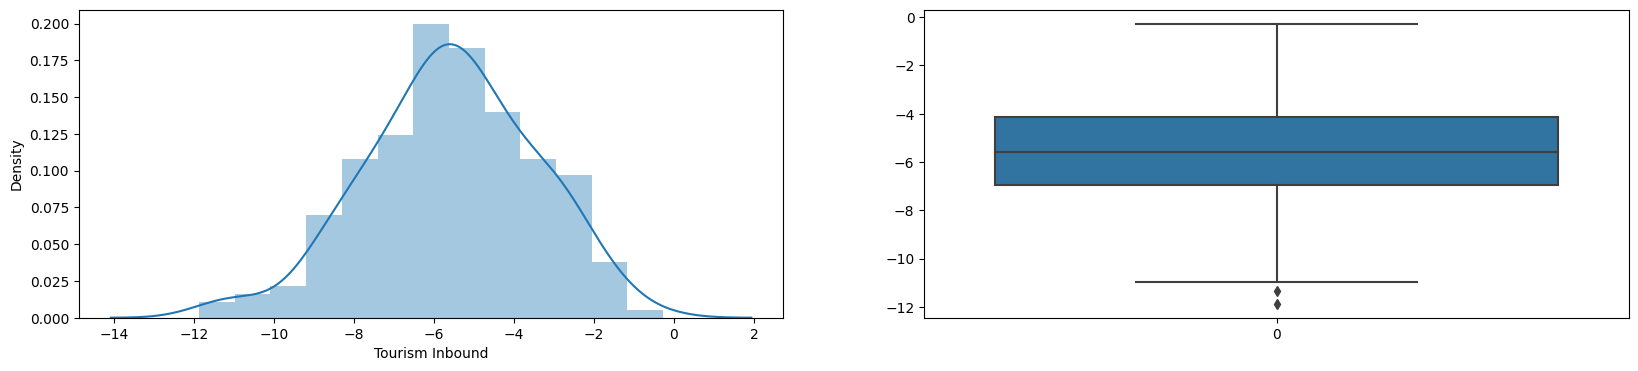

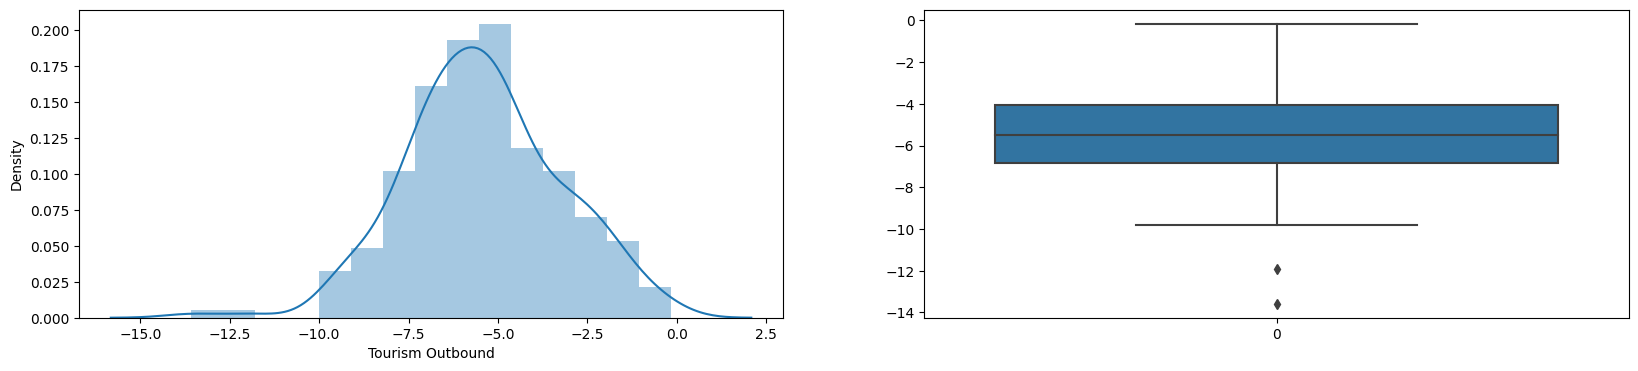

In [18]:
def plot(x,**kwarge):
  fig, ax = plt.subplots(1, 2, figsize=(20,4))
  sns.distplot(x, ax=ax[0],kde=True)
  sns.boxplot(x, ax=ax[1])
  plt.show()
for i in df3.columns:
  if i!="Country":
    plot(df3[i])
  else:
    continue 

In [19]:
df3=df3.drop("Country",axis=3-2)
df3 

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,-0.297385,-2.438146,-7.702702,-4.434260,-5.071788,-7.261948,-0.962786,-5.757115,-2.274502,-0.582557,...,0.428645,0.394049,0.106056,0.969395,0.042977,-2.588359,-3.925918,-1.768971,-7.758797,-7.404030
1,-1.909535,-2.302941,-7.481008,-3.530351,-7.167115,-7.364943,-1.412981,-3.935029,-2.020215,-2.261000,...,0.846561,0.713858,0.241739,0.335280,0.486402,-0.983019,-6.143759,-0.796760,-4.959471,-4.638351
2,-1.055727,-1.755201,-4.327664,-3.306681,-4.310662,-4.750481,-1.918285,-4.135845,-1.884552,-1.752787,...,0.684295,0.620165,0.227263,0.430988,0.515333,-1.736198,-3.635000,-0.467218,-6.443178,-5.492354
3,-1.491888,-3.137786,-7.636838,-2.509380,-6.075522,-6.690770,-1.227989,-1.195337,-2.580738,-3.281912,...,0.859463,0.729074,0.206897,0.308473,0.516991,-0.999183,-10.472636,-0.142120,-4.165302,-3.990516
4,-2.410272,-2.128809,-9.849737,-3.985654,-3.873322,-5.030918,-1.328623,-1.309052,-2.610466,-5.249024,...,0.893497,0.754470,0.262375,0.284908,0.484647,-0.783551,-10.029203,-0.127831,-5.606226,-4.921062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-1.561488,-2.411987,-4.363677,-2.816232,-4.054003,-5.156255,-1.368283,-5.090385,-1.077172,-1.930561,...,0.849821,0.654396,0.264802,0.354912,0.539012,-1.349245,-2.768803,-1.488025,-3.983614,-4.674953
204,-2.118102,-2.005859,-8.310744,-4.089081,-4.448371,-5.824915,-1.306630,-1.835150,-2.624306,-3.785603,...,0.897789,0.761638,0.250182,0.258712,0.484619,-0.696784,-9.638095,-0.065858,-5.103231,-4.988673
205,-0.540853,-1.837661,-6.031215,-2.912578,-5.897135,-6.509902,-1.645337,-5.211308,-2.363055,-1.041138,...,0.507796,0.465143,0.102819,0.835420,0.161078,-2.303651,-4.140417,-1.419285,-5.785390,-6.177861
206,-0.229135,-2.673770,-8.195582,-3.149001,-5.847070,-7.161206,-1.351129,-5.087119,-2.655874,-0.717769,...,0.270535,0.254646,0.101335,0.914705,0.082637,-2.316679,-4.690289,-1.133928,-7.425708,-7.030882


# Model Building

In [20]:
knn_imputer = KNNImputer(n_neighbors=5)
imputed_df = pd.DataFrame(knn_imputer.fit_transform(df3),columns=df3.columns)

In [21]:
df3=imputed_df
df3

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,-0.297385,-2.438146,-7.702702,-4.434260,-5.071788,-7.261948,-0.962786,-5.757115,-2.274502,-0.582557,...,0.428645,0.394049,0.106056,0.969395,0.042977,-2.588359,-3.925918,-1.768971,-7.758797,-7.404030
1,-1.909535,-2.302941,-7.481008,-3.530351,-7.167115,-7.364943,-1.412981,-3.935029,-2.020215,-2.261000,...,0.846561,0.713858,0.241739,0.335280,0.486402,-0.983019,-6.143759,-0.796760,-4.959471,-4.638351
2,-1.055727,-1.755201,-4.327664,-3.306681,-4.310662,-4.750481,-1.918285,-4.135845,-1.884552,-1.752787,...,0.684295,0.620165,0.227263,0.430988,0.515333,-1.736198,-3.635000,-0.467218,-6.443178,-5.492354
3,-1.491888,-3.137786,-7.636838,-2.509380,-6.075522,-6.690770,-1.227989,-1.195337,-2.580738,-3.281912,...,0.859463,0.729074,0.206897,0.308473,0.516991,-0.999183,-10.472636,-0.142120,-4.165302,-3.990516
4,-2.410272,-2.128809,-9.849737,-3.985654,-3.873322,-5.030918,-1.328623,-1.309052,-2.610466,-5.249024,...,0.893497,0.754470,0.262375,0.284908,0.484647,-0.783551,-10.029203,-0.127831,-5.606226,-4.921062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-1.561488,-2.411987,-4.363677,-2.816232,-4.054003,-5.156255,-1.368283,-5.090385,-1.077172,-1.930561,...,0.849821,0.654396,0.264802,0.354912,0.539012,-1.349245,-2.768803,-1.488025,-3.983614,-4.674953
204,-2.118102,-2.005859,-8.310744,-4.089081,-4.448371,-5.824915,-1.306630,-1.835150,-2.624306,-3.785603,...,0.897789,0.761638,0.250182,0.258712,0.484619,-0.696784,-9.638095,-0.065858,-5.103231,-4.988673
205,-0.540853,-1.837661,-6.031215,-2.912578,-5.897135,-6.509902,-1.645337,-5.211308,-2.363055,-1.041138,...,0.507796,0.465143,0.102819,0.835420,0.161078,-2.303651,-4.140417,-1.419285,-5.785390,-6.177861
206,-0.229135,-2.673770,-8.195582,-3.149001,-5.847070,-7.161206,-1.351129,-5.087119,-2.655874,-0.717769,...,0.270535,0.254646,0.101335,0.914705,0.082637,-2.316679,-4.690289,-1.133928,-7.425708,-7.030882


In [22]:
# to find the optimal values of eps and min_sample
eps_list = np.linspace(start=0.2, stop=5, num=800)
silhouette_scores = []
for eps in eps_list:
  for j in range(2,20):
    dbscan = DBSCAN(eps=eps, min_samples=j)     
    labels = dbscan.fit_predict(df3)
    if 5>=len(np.unique(labels)) >3:
        silhouette_avg = silhouette_score(df3, labels)
        silhouette_scores.append((silhouette_avg,eps,j,set(labels)))

print(max(silhouette_scores))

(0.08941463800058973, 3.456070087609512, 9, {0, 1, 2, -1})


# DBSCAN

In [23]:
# DBSCN with eps=0.31 and min_samples=9
dbscan = DBSCAN(eps=3.456070087609512, min_samples=9)     
labels = dbscan.fit_predict(df3)
print(silhouette_score(df3, labels))
print(set(labels))

0.08941463800058973
{0, 1, 2, -1}


In [24]:
# DBSCAN with PCA 
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(df3)

In [25]:
eps_list = np.linspace(start=0.2, stop=5, num=500)
silhouette_scores = []
for eps in eps_list:
  for j in range(2,20):
    dbscan = DBSCAN(eps=eps, min_samples=j)     
    labels = dbscan.fit_predict(x_pca)
    if 5>=len(np.unique(labels))>=4:
        silhouette_avg = silhouette_score(x_pca, labels)
        silhouette_scores.append((silhouette_avg,eps,j,set(labels)))

In [26]:
print(max(silhouette_scores))

(0.1293072436023444, 2.6817635270541085, 4, {0, 1, 2, -1})


In [27]:
# DBSCN with pca 
dbscan = DBSCAN(eps=2.6817635270541085, min_samples=4)     
labels = dbscan.fit_predict(x_pca)
print('silhouette_score :',silhouette_score(x_pca, labels)," DB index:",sklearn.metrics.davies_bouldin_score(x_pca, labels))
print(" labels:" , set(labels))

silhouette_score : 0.1293072436023444  DB index: 3.2879890645063057
 labels: {0, 1, 2, -1}


In [28]:
from sklearn.cluster import Birch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import davies_bouldin_score, make_scorer
param_grid = {
    'threshold': [0.5, 1, 1.5,2],
    'branching_factor': [10,15,20,25,30,40,50],
    'n_clusters': [5, 3, 4,6]
}
birch = Birch()
grid_search = GridSearchCV(birch, param_grid=param_grid, cv=5,
                           scoring = {'db_index': make_scorer(davies_bouldin_score), 
                                      'silhouette': make_scorer(silhouette_score)},
                           refit='silhouette')
grid_search.fit(df3)
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'branching_factor': 10, 'n_clusters': 5, 'threshold': 0.5}


In [29]:
# BRICH clustering 
brich =Birch(branching_factor=10, n_clusters=5, threshold=0.5)     
labels = brich.fit_predict(x_pca)
print('silhouette_score :',silhouette_score(x_pca, labels)," DB index:",sklearn.metrics.davies_bouldin_score(x_pca, labels))
print(" labels:" , set(labels))

silhouette_score : 0.2433475370664888  DB index: 1.04517046365928
 labels: {0, 1, 2, 3, 4}


# K-Means Clustering

In [30]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
#conda install yellowbrick

ValueError: ignored

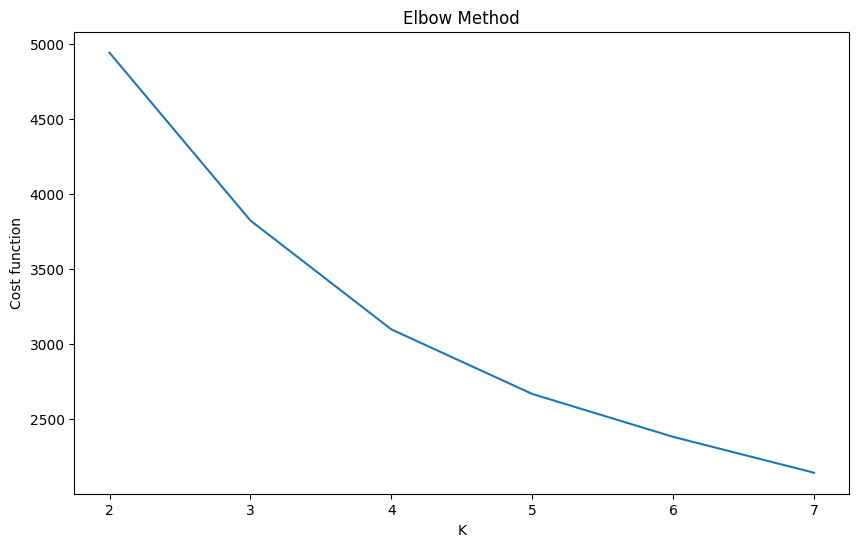

In [32]:
cost_function=[]
for i in range(2,8):
   k_mean=KMeans(n_clusters=i, init='k-means++')
   k_mean.fit(df3)
   cost_function.append(k_mean.inertia_)
plt.figure(figsize=(10,6))
plt.plot([i for i in range(2,8)],cost_function)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("Cost function")
plt.show()

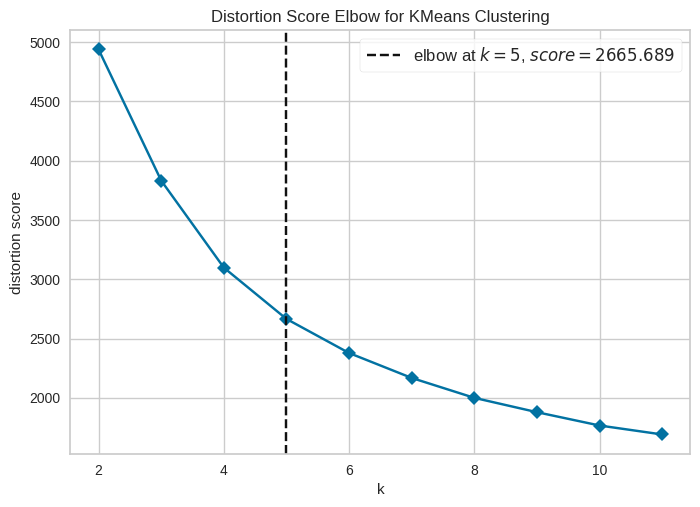

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from yellowbrick.cluster import KElbowVisualizer
model =KMeans(init='k-means++',random_state=8)
visualizer = KElbowVisualizer(model, k=(2,12), metric='distortion', timings=False)
visualizer.fit(df3)        
visualizer.show() 

In [34]:
# optimal value if the k is 3   # with good score of the k-mean clustering 
k_mean=KMeans(n_clusters=5, init='k-means++')
k_mean.fit(df3)
labels = k_mean.fit_predict(df3)
print('silhouette_score :',silhouette_score(x_pca, labels)," DB index:",sklearn.metrics.davies_bouldin_score(x_pca, labels))
print(" labels:" , set(labels))

silhouette_score : 0.2793213927714381  DB index: 1.0632057998337898
 labels: {0, 1, 2, 3, 4}


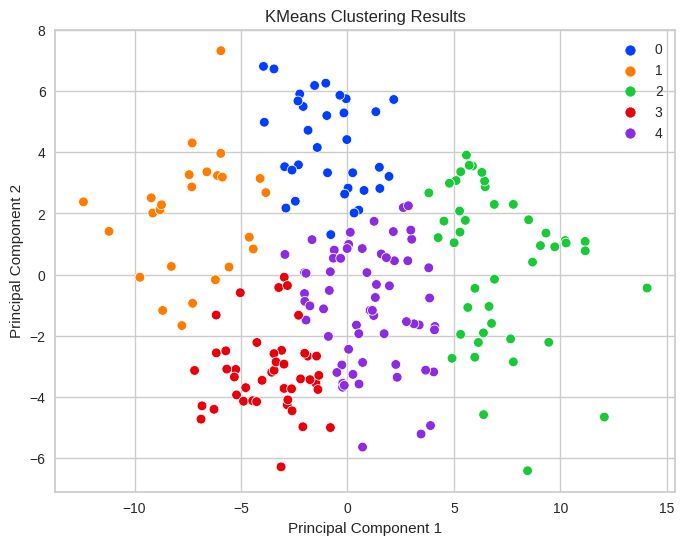

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=labels, palette='bright')
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

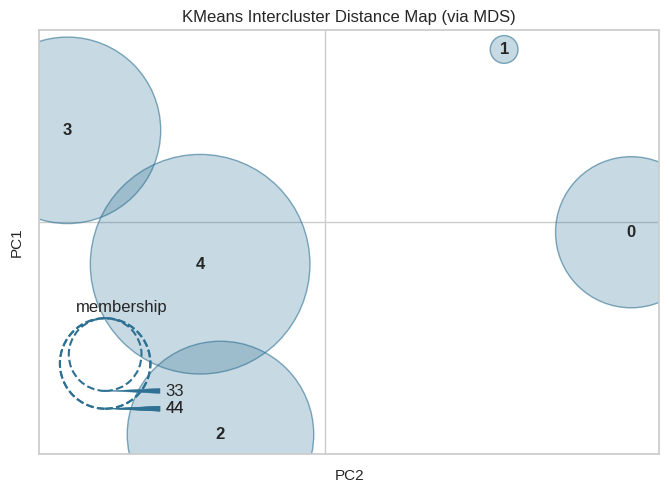

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [36]:
from yellowbrick.cluster import InterclusterDistance
visualizer = InterclusterDistance(k_mean)
plt.figure(figsize=(10,6))
visualizer.fit(x_pca)        
visualizer.show()

# Hierarchical Clustering

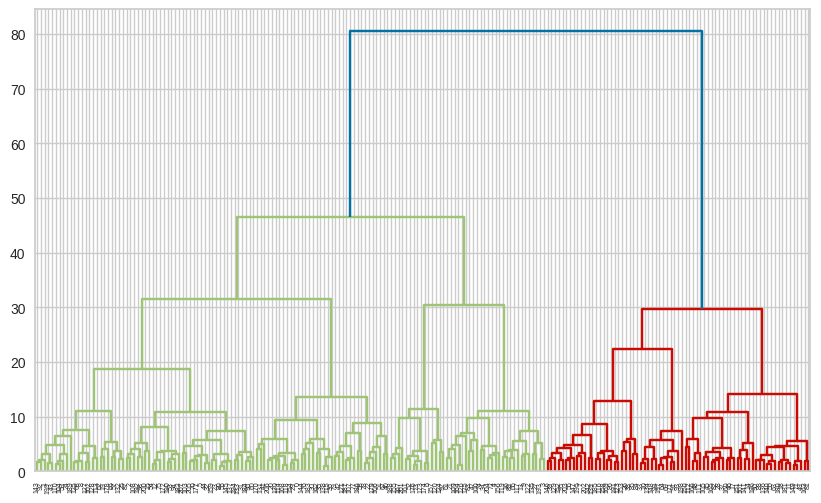

In [37]:
# Dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
linked = linkage(df3, method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked, orientation='top', labels=None, distance_sort='descending', show_leaf_counts=True)
plt.show()

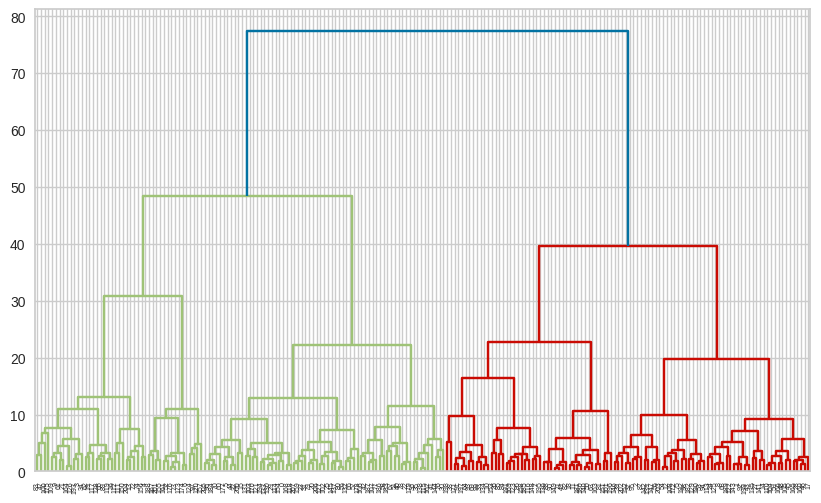

In [38]:
# dendrogram for PCA 
from scipy.cluster.hierarchy import linkage, dendrogram
linked = linkage(x_pca, method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked, orientation='top', labels=None, distance_sort='descending', show_leaf_counts=True)
plt.show()

In [39]:
agg_cluster = AgglomerativeClustering(n_clusters=5)
agg_cluster.fit(df3) 
labels =agg_cluster.fit_predict(x_pca)
print('silhouette_score :',silhouette_score(x_pca, labels)," DB index:",sklearn.metrics.davies_bouldin_score(x_pca, labels))
print(" labels:" , set(labels))

silhouette_score : 0.2646405574892651  DB index: 1.0842065331658408
 labels: {0, 1, 2, 3, 4}


# HDBSCAN Clustering

In [40]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 43.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541487 sha256=f970f669863e5837337586a6d92ca8f3e3852614b9ece98e31b5baf2545ed418
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan


In [42]:
#conda install -c conda-forge hdbscan

In [43]:
import hdbscan
param_grid = {
    'min_cluster_size': [4,5],
    'cluster_selection_epsilon':[0.01,0.02,0.1,0.23,0.26,0.25,0.35,2,1,1.12,2.3],
    'metric': ['euclidean', 'manhattan', 'cosine'],
}
hdbscan_model = hdbscan.HDBSCAN(prediction_data=True)
scoring = make_scorer(silhouette_score)
grid_search = GridSearchCV(hdbscan_model, param_grid=param_grid, cv=5, scoring=scoring)
grid_search.fit(x_pca)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'cluster_selection_epsilon': 0.01, 'metric': 'euclidean', 'min_cluster_size': 4}


In [44]:
clusterer = hdbscan.HDBSCAN(cluster_selection_epsilon=0.01, metric='euclidean', min_cluster_size=4)
print(silhouette_score(x_pca, clusterer.fit_predict(x_pca)))

-0.2119493475857757


In [45]:
# visualization of T-sne
from sklearn.manifold import TSNE
import matplotlib.cm as cm
k_mean=KMeans(n_clusters=5, init='k-means++')
k_mean.fit(x_pca)
print(silhouette_score(x_pca, k_mean.fit_predict(x_pca)))
colors = cm.viridis(k_mean.fit_predict(x_pca))

0.2808500702689518


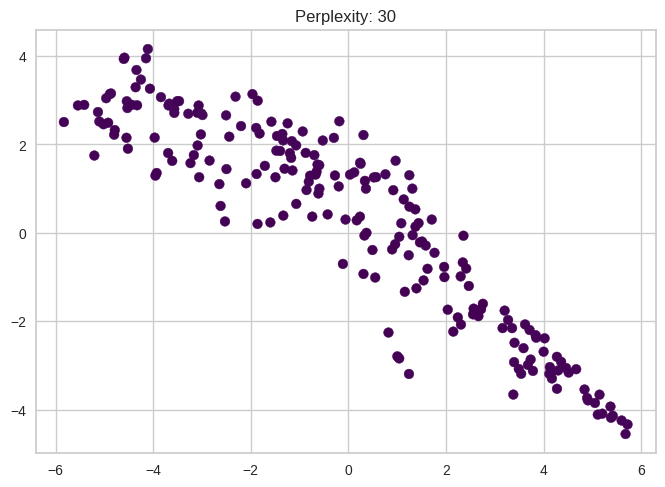

In [46]:

perplexities = [30]
for perplexity in perplexities:
    tsne = TSNE(n_components=3, perplexity=perplexity, n_iter=5000, learning_rate=50)
    X_tsne = tsne.fit_transform(x_pca)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors)
    plt.title(f"Perplexity: {perplexity}")
    plt.show()

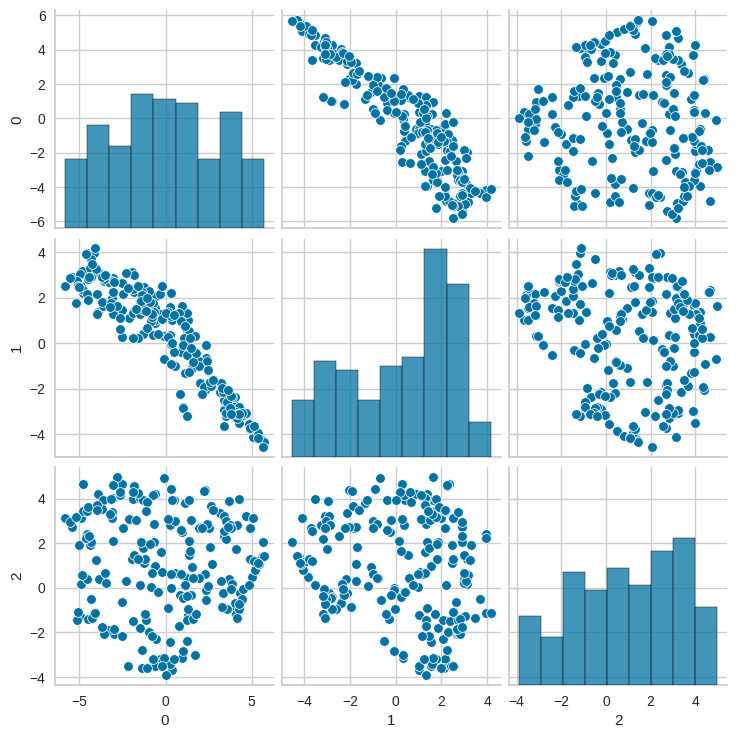

In [47]:
sns.pairplot(pd.DataFrame(X_tsne))

In [48]:
import hdbscan 
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, prediction_data=True,cluster_selection_epsilon=0.35)
print(silhouette_score(df3, clusterer.fit_predict(df3)))

0.05790387455310095


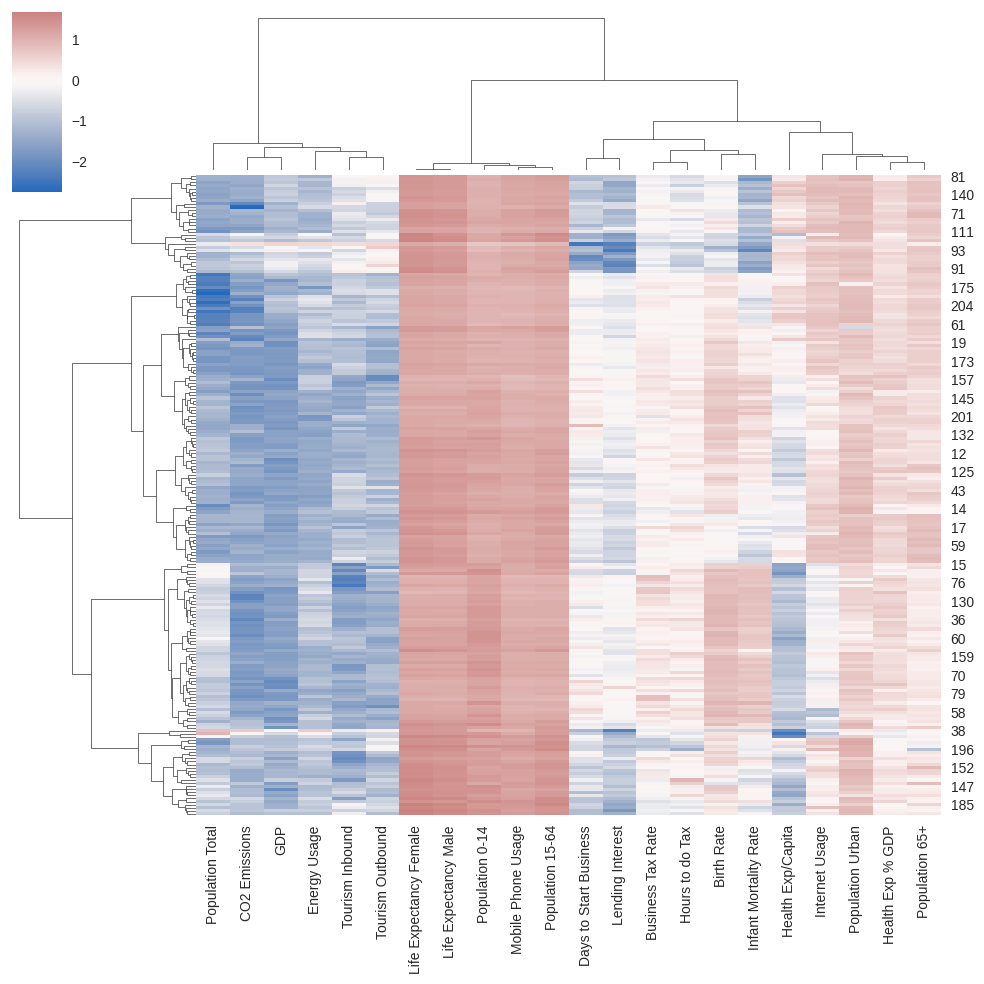

In [49]:
sns.clustermap(df3, metric="euclidean", method="ward",z_score=0, center=0 ,cmap="vlag")

In [50]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(df3)
fig.update_layout(width=800, height=500)
fig.show()

In [51]:
import plotly.figure_factory as ff
distance = 'euclidean'
method = 'ward'
fig = ff.create_dendrogram(df3, linkagefun=lambda x: linkage(x, method=method, metric=distance))
fig.update_layout(width=800, height=500)
fig.show()

In [52]:
pca = PCA(n_components=0.95)
df_pca =pd.DataFrame(pca.fit_transform(df3))

In [53]:
df_pca

,0,1,2,3,4,5,6,7
0,-2.830097,-4.263324,-0.875384,1.097879,-0.332656,0.340753,1.218800,-0.502971
1,-0.619480,0.800667,1.601759,0.599032,-0.477295,-0.082545,-0.666916,0.145165
2,2.274653,-2.941464,-0.974272,-1.106063,-0.409441,-0.753465,0.474435,-0.249778
3,-0.161387,5.289126,0.336982,-0.720339,2.291375,0.243780,-1.196512,0.158464
4,-0.057424,5.753331,-3.116026,1.642823,1.037330,0.055322,-0.810825,0.374323
...,...,...,...,...,...,...,...,...
203,3.675068,-3.128693,0.670770,-0.474839,-0.959419,0.930004,-0.454080,0.146363
204,-0.026286,4.418086,-1.912102,0.580639,1.017790,0.612387,-0.679163,0.528691
205,-0.493397,-3.204788,0.800067,-0.226758,-0.034196,0.229498,0.041787,-0.583307
206,-2.977056,-2.931024,-0.238881,0.614221,0.343067,-0.214765,0.405662,-1.073296


<Axes: xlabel='0', ylabel='1'>

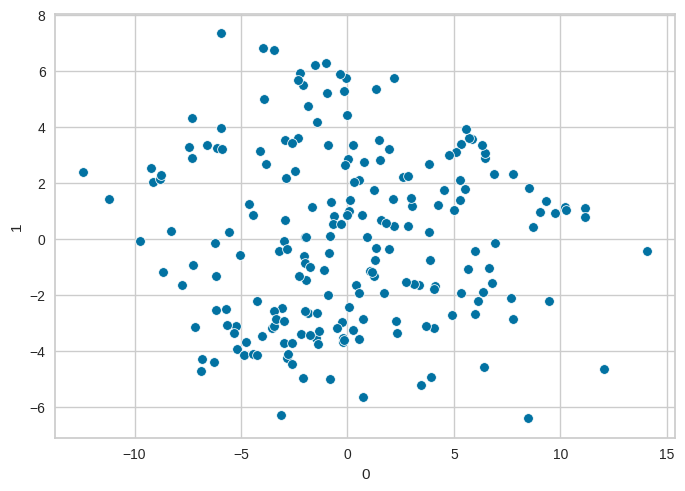

In [54]:
sns.scatterplot(
    data=df_pca, x=0, y=1,
    sizes=(20, 200), legend="full"
)

<Axes: xlabel='3', ylabel='4'>

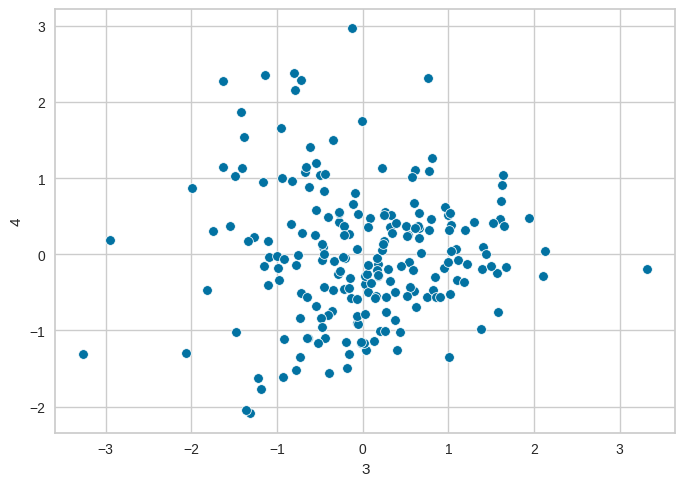

In [55]:
sns.scatterplot(
    data=df_pca, x=3, y=4,
    sizes=(20, 200), legend="full"
)

In [56]:
import pickle

In [57]:
with open('k_mean.pkl', 'wb') as file:
    pickle.dump(k_mean, file)

In [58]:
with open('k_mean.pkl', 'rb') as file:
    kmeans_loaded = pickle.load(file)